## Prelim Notes

https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations
    
    - Explanation of delay data

This link may provide a sanity check for making sure we've counted all the delays: 

https://www.bts.gov/topics/airline-time-tables

Deciding to go with data from this source: 
https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236

## IMPORTant things (hehe)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
pd.options.display.max_columns = None

In [17]:
# folder_name = "../flight_data/"
# files = ['april', 'march', 'february', 'january', 'december', 'november']
# for month in files: 
#     print(f"{folder_name}{month}_2019")

../flight_data/april_2019
../flight_data/march_2019
../flight_data/february_2019
../flight_data/january_2019
../flight_data/december_2019
../flight_data/november_2019


In [4]:
def file_read_in(folder_name):
    combined = pd.DataFrame()
    files = ['april', 'march', 'february', 'january', 'december', 'november']
    for month in files: 
        data = pd.read_csv(f"{folder_name}{month}_2019.csv")
        combined = pd.concat([combined, data])
    return combined
        

In [5]:
airline_names = pd.read_csv("../flight_data/airline_name_and_code_key.csv")

In [6]:
df = file_read_in("../flight_data/")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [7]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 55
0,2019,2,4,30,2,2019-04-30,F9,20436,N711FR,2867,12391,1239103,31703,ISP,"Islip, NY",NY,36,New York,22,14027,1402702,34027,PBI,"West Palm Beach/Palm Beach, FL",FL,12,Florida,33,1548,1542.0,-6.0,0.0,0.0,-1.0,1500-1559,8.0,1550.0,1805.0,1813.0,-27.0,0.0,0.0,-2.0,1800-1859,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,2,4,30,2,2019-04-30,F9,20436,N711FR,2866,14027,1402702,34027,PBI,"West Palm Beach/Palm Beach, FL",FL,12,Florida,33,12391,1239103,31703,ISP,"Islip, NY",NY,36,New York,22,1940,1924.0,-16.0,0.0,0.0,-2.0,1900-1959,11.0,1935.0,2154.0,2201.0,-24.0,0.0,0.0,-2.0,2200-2259,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,2,4,30,2,2019-04-30,F9,20436,N712FR,1162,13204,1320402,31454,MCO,"Orlando, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,635,630.0,-5.0,0.0,0.0,-1.0,0600-0659,15.0,645.0,849.0,857.0,-15.0,0.0,0.0,-1.0,0900-0959,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,2,4,30,2,2019-04-30,F9,20436,N712FR,108,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,14843,1484306,34819,SJU,"San Juan, PR",PR,72,Puerto Rico,3,2143,2145.0,2.0,2.0,0.0,0.0,2100-2159,32.0,2217.0,200.0,212.0,22.0,22.0,1.0,1.0,0001-0559,0.0,NaN,0.0,2.0,0.0,20.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019,2,4,30,2,2019-04-30,F9,20436,N713FR,420,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,535,637.0,62.0,62.0,1.0,4.0,0001-0559,38.0,715.0,1155.0,1203.0,89.0,89.0,1.0,5.0,1000-1059,0.0,NaN,0.0,62.0,0.0,27.0,0.0,0.0,618.0,8.0,8.0,NaN


## Subsetting/Trimming Data

In [8]:
AA = df.loc[(df.OP_UNIQUE_CARRIER == 'AA')]


In [9]:
pop = df.loc[(df.OP_UNIQUE_CARRIER != 'AA')]

In [10]:
drop = ['TAIL_NUM',
        'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
        'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
        'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
        'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
        'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
        'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
        'DEP_TIME', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
        'WHEELS_ON', 'ARR_TIME', 'FIRST_DEP_TIME',
        'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME', 'Unnamed: 55']

In [12]:
pop = pop.drop(columns = drop)

In [13]:
pop.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [14]:
#AA.info()
pop.OP_UNIQUE_CARRIER.value_counts()

WN    670877
DL    458572
OO    390376
UA    299902
YX    154967
MQ    152116
B6    148036
OH    138891
AS    124215
9E    122099
YV    108913
NK     92235
EV     77039
F9     57916
G4     48890
HA     40680
Name: OP_UNIQUE_CARRIER, dtype: int64

In [15]:
df.groupby([df.OP_UNIQUE_CARRIER]).nunique() ## Confirming that we are getting the data we expect to get in the DF

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 55
OP_UNIQUE_CARRIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9E,2,3,6,31,7,181,1,1,154,759,126,129,116,126,124,37,37,37,37,126,129,116,126,124,37,37,37,37,992,1212,650,618,2,15,19,149,1219,1252,1251,696,626,2,15,19,2,3,2,419,292,307,15,374,581,135,133,0
AA,2,3,6,31,7,181,1,1,965,2517,110,110,98,110,108,46,46,46,46,110,110,98,110,108,46,46,46,46,1221,1362,930,898,2,15,19,166,1366,1436,1438,982,906,2,15,19,2,3,2,733,346,361,74,565,1047,178,174,0
AS,2,3,6,31,7,181,1,1,234,1402,73,73,64,73,72,32,32,32,32,73,73,64,73,72,32,32,32,32,441,1317,457,406,2,15,19,154,1322,1439,1439,493,410,2,15,19,2,4,2,311,200,266,46,311,781,126,123,0
B6,2,3,6,31,7,181,1,1,298,1126,68,70,56,68,66,32,32,32,32,68,70,56,68,66,32,32,32,32,1165,1440,668,636,2,15,19,141,1440,1440,1440,713,635,2,15,19,2,3,2,516,213,364,59,452,781,143,139,0
DL,2,3,6,31,7,181,1,1,897,2629,151,153,134,151,147,51,51,51,51,151,153,134,151,147,51,51,51,51,1136,1343,911,884,2,15,19,154,1349,1436,1436,985,905,2,15,19,2,3,2,724,509,458,43,452,960,169,165,0
EV,2,3,6,31,7,181,1,1,140,645,129,131,122,129,127,40,40,40,40,129,131,122,129,127,40,40,40,40,758,1210,670,640,2,15,19,136,1211,1242,1239,711,653,2,15,19,2,3,2,461,214,425,1,331,408,110,110,0
F9,2,3,6,31,7,181,1,1,88,1318,99,99,91,99,98,46,46,46,46,99,99,91,99,98,46,46,46,46,1024,1418,490,456,2,15,19,120,1418,1429,1431,507,443,2,15,19,2,2,2,327,101,187,1,381,353,90,89,0
G4,2,3,6,31,7,181,1,1,104,1256,121,125,120,121,121,43,43,43,43,121,125,120,121,121,43,43,43,43,947,1151,494,459,2,15,19,102,1164,1261,1265,515,449,2,15,19,2,3,2,363,174,173,41,310,260,77,76,0
HA,2,3,6,31,7,181,1,1,61,423,19,20,16,19,19,9,9,9,9,19,20,16,19,19,9,9,9,9,572,1205,266,238,2,15,19,65,1220,1216,1217,288,226,2,15,19,2,1,2,198,66,38,36,144,139,49,49,0


In [53]:
#df.columns
#df.OP_UNIQUE_CARRIER.value_counts()

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME',
       'TOTAL_ADD_GTIME', 'LONGEST

## Checking out distributions of raw data

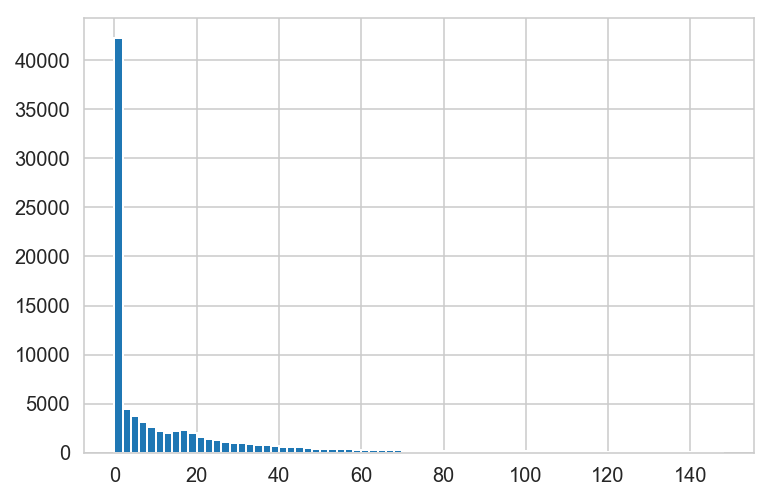

In [16]:
AA.CARRIER_DELAY.hist(bins = range(0,150, 2))

##  Histogram of carrier delays (minutes) for American Airlines.

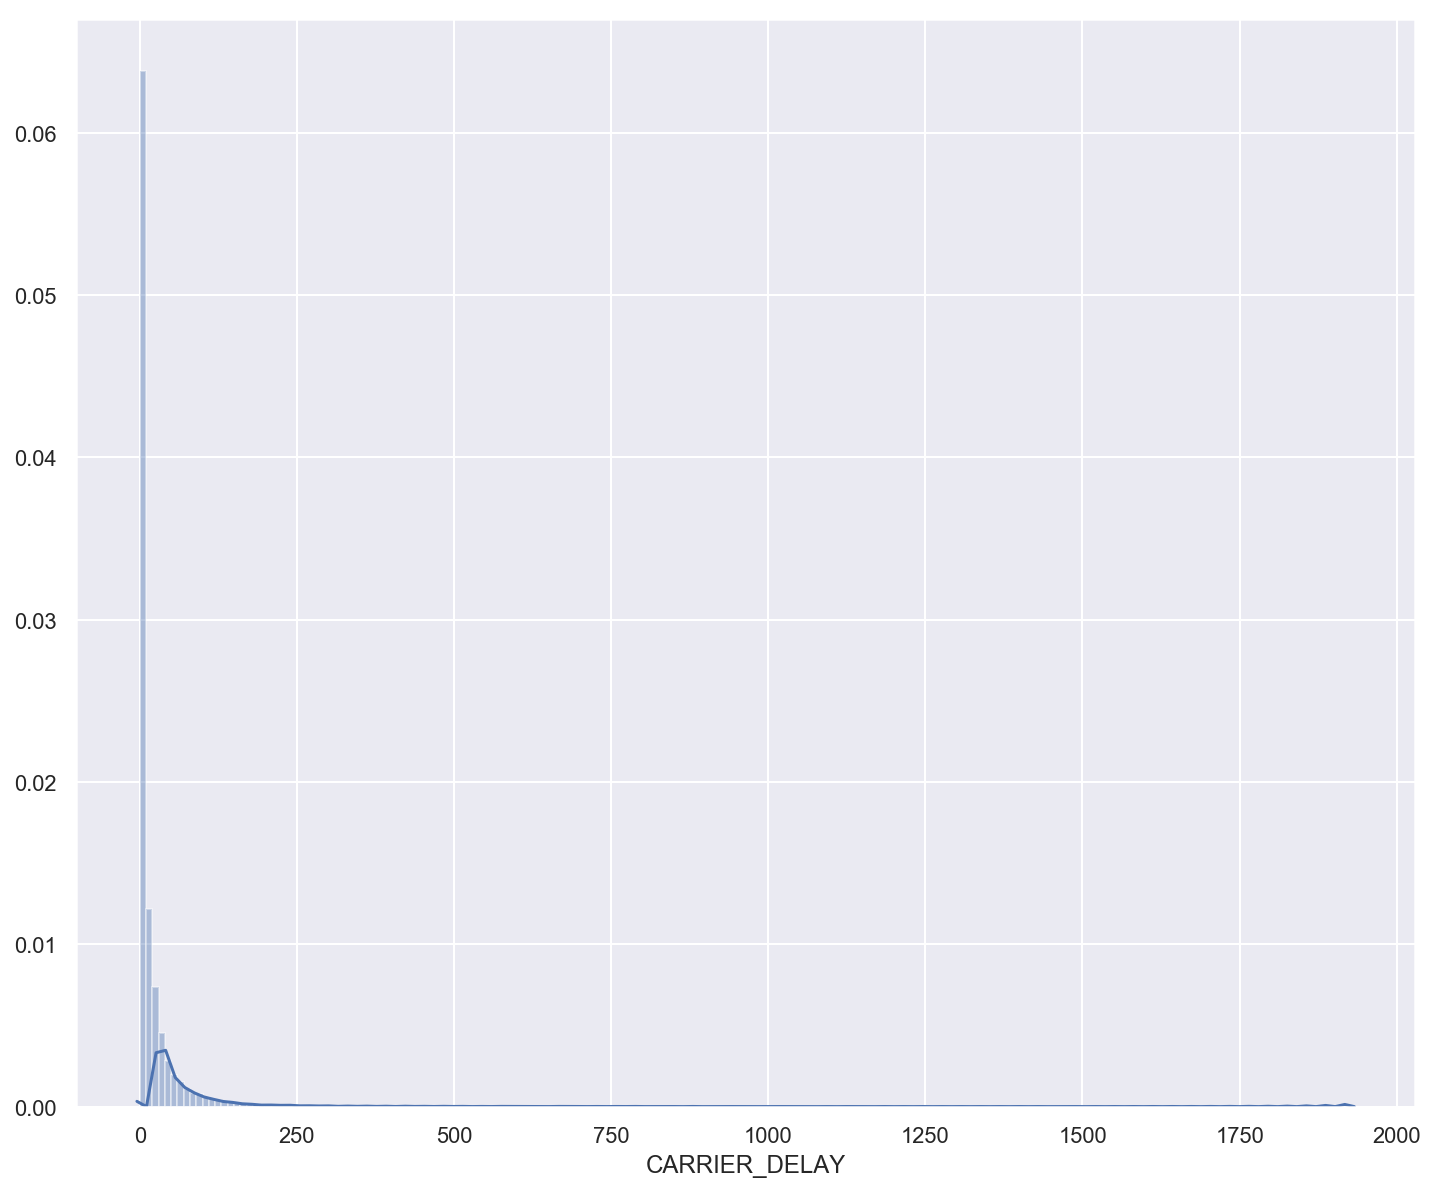

In [17]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(AA.CARRIER_DELAY.loc[AA.ARR_DEL15 == 1], bins = range(0,250, 10))

## Think I need to get rid of zero-values and answer the question: "When there IS a carrier delay, is AA mean C.D.T greater than the population's?"

Text(0.5, 0, 'Delay Times (minutes)')

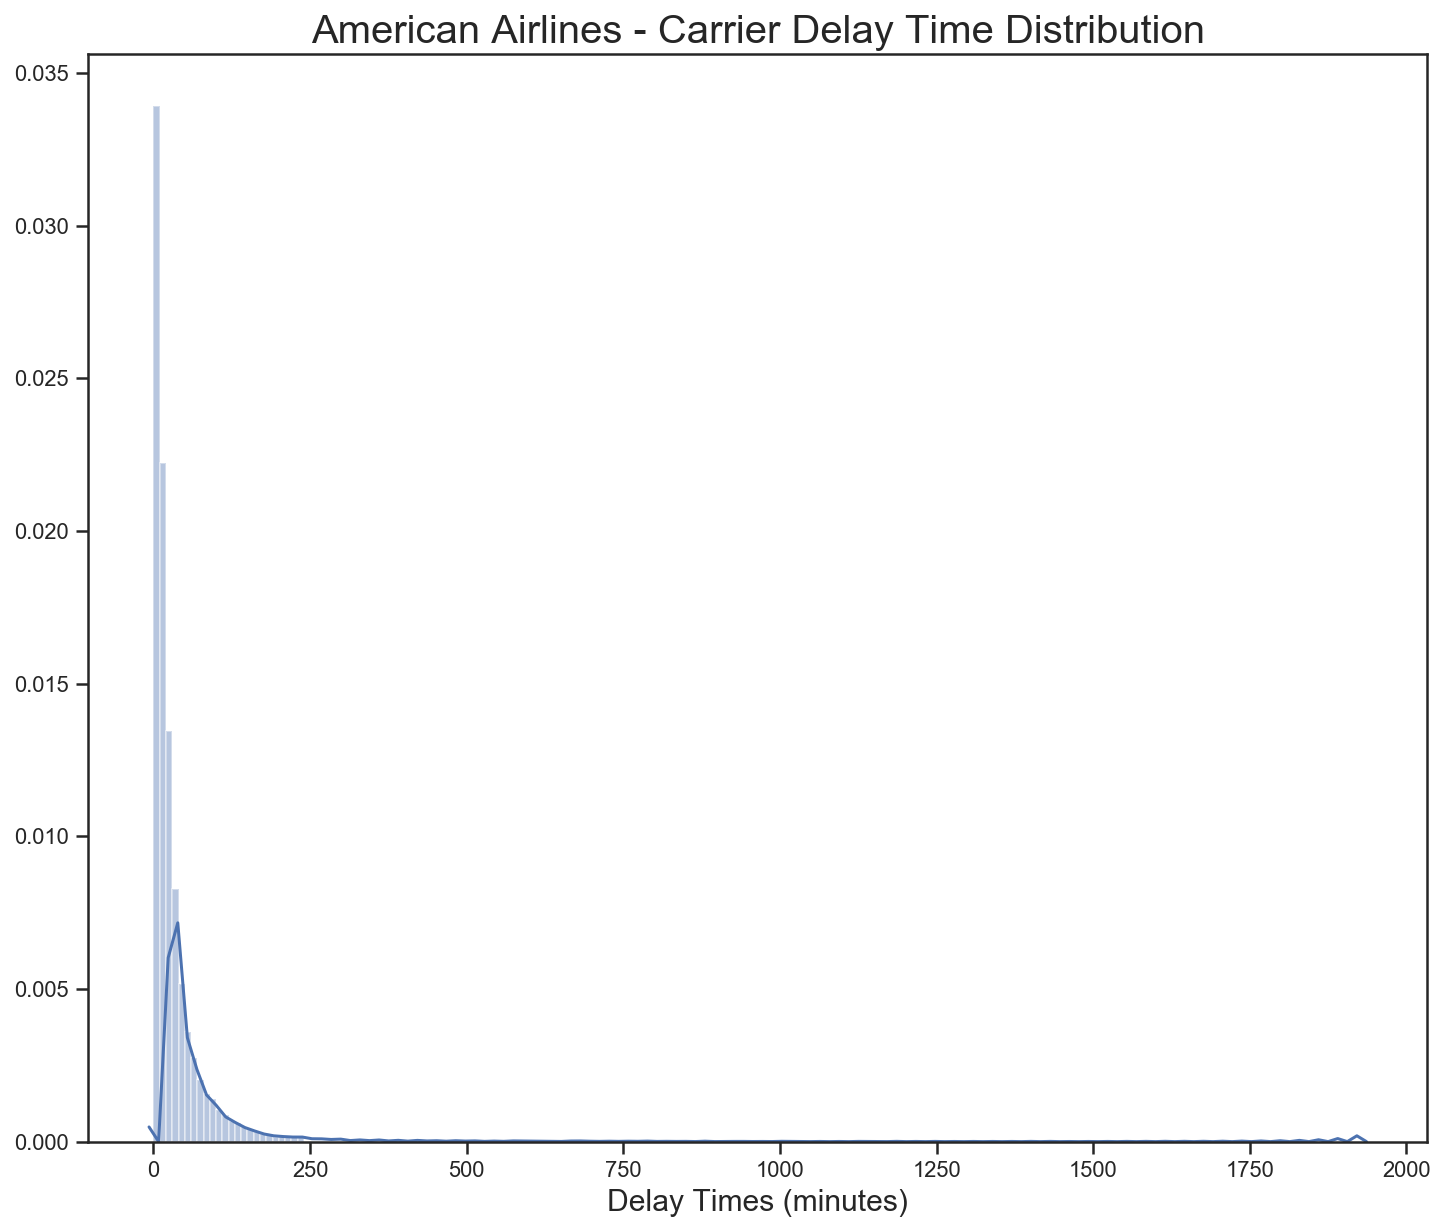

In [224]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.set_style("ticks", {"xtick.major.size":50, "ytick.major.size":50})
ax = sns.distplot(AA.CARRIER_DELAY.loc[(AA.ARR_DEL15 == 1) & (AA.CARRIER_DELAY != 0)], bins = range(0,250, 10))
ax.set_title('American Airlines - Carrier Delay Time Distribution', {'fontsize': 20,
        'fontweight' : 12,
        'verticalalignment': 'baseline'})
ax.set_xlabel('Delay Times (minutes)', fontdict={'fontsize' : 15})

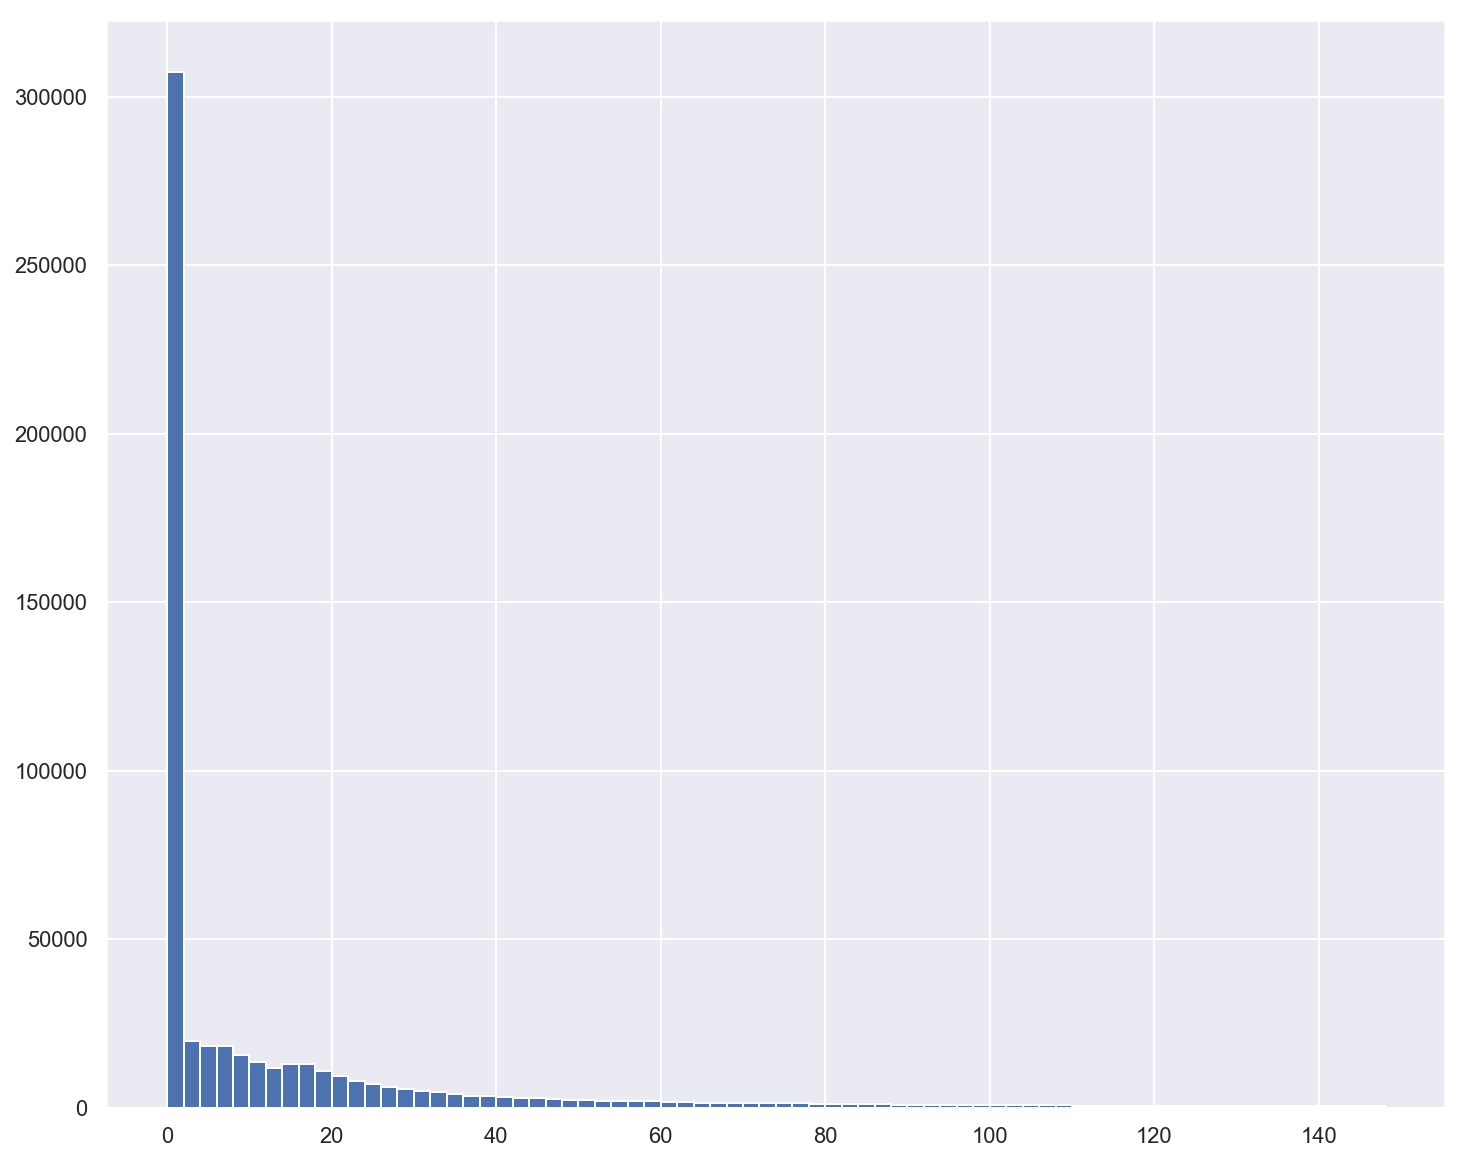

In [19]:
pop.CARRIER_DELAY.hist(bins = range(0,150, 2))

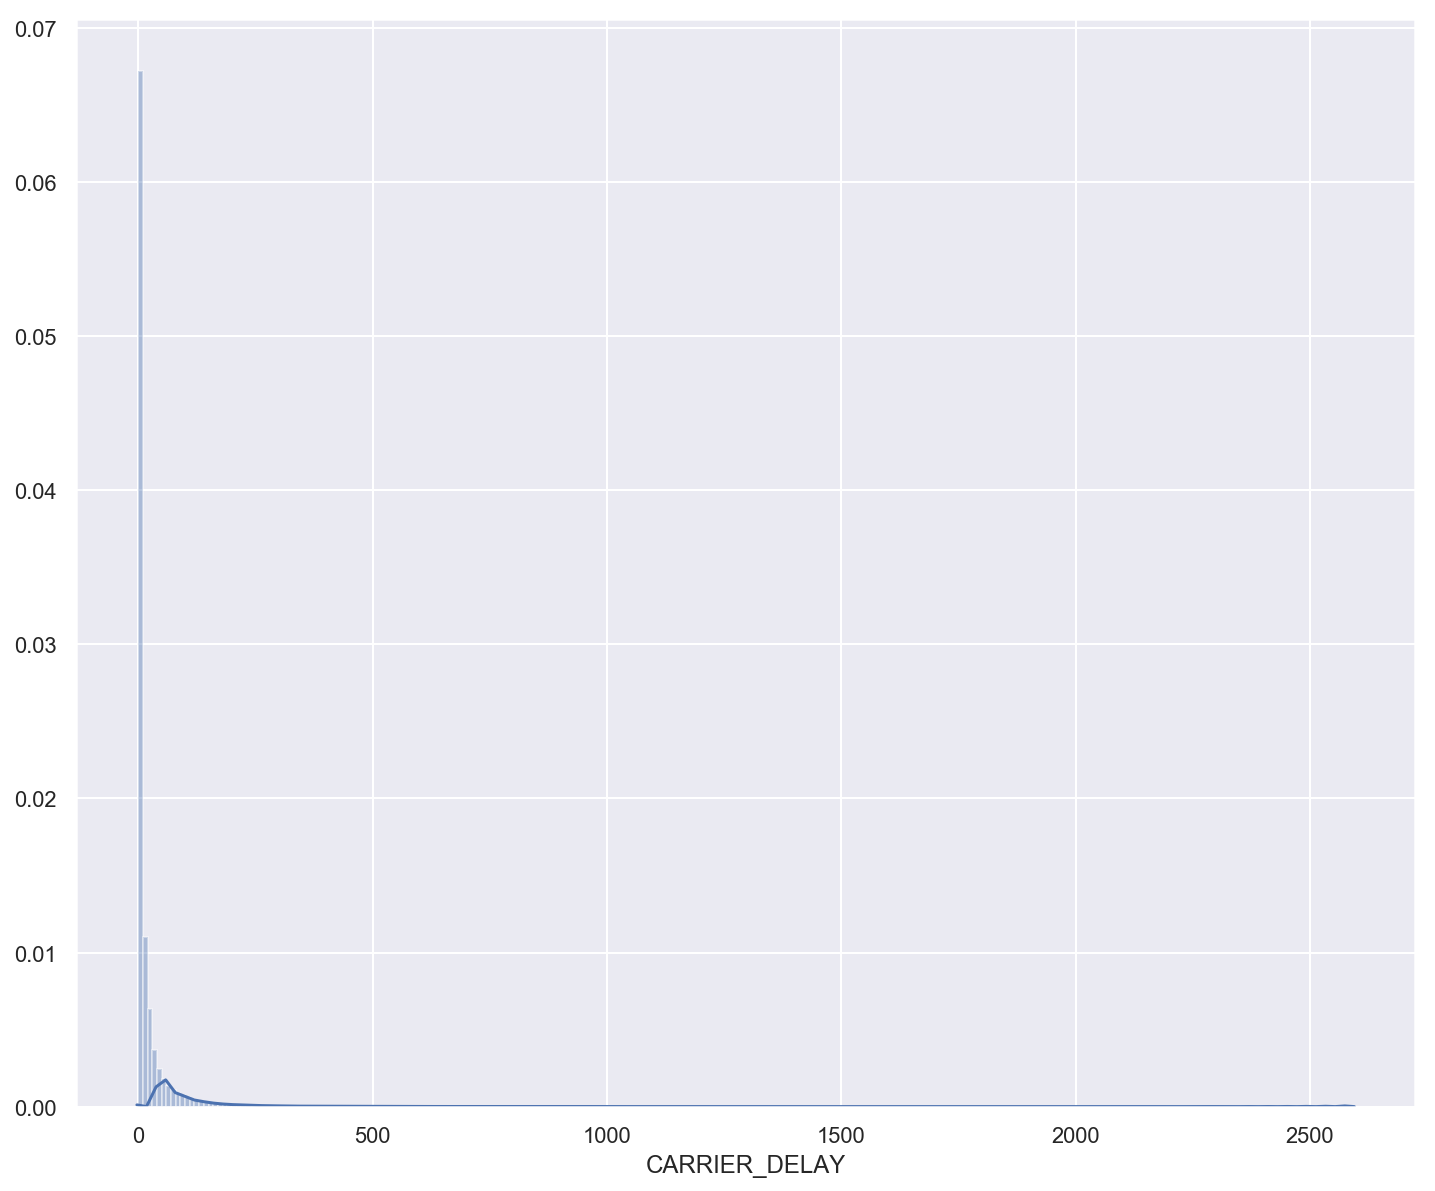

In [98]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(pop.CARRIER_DELAY.loc[pop.ARR_DEL15 == 1], bins = range(0,250, 10))

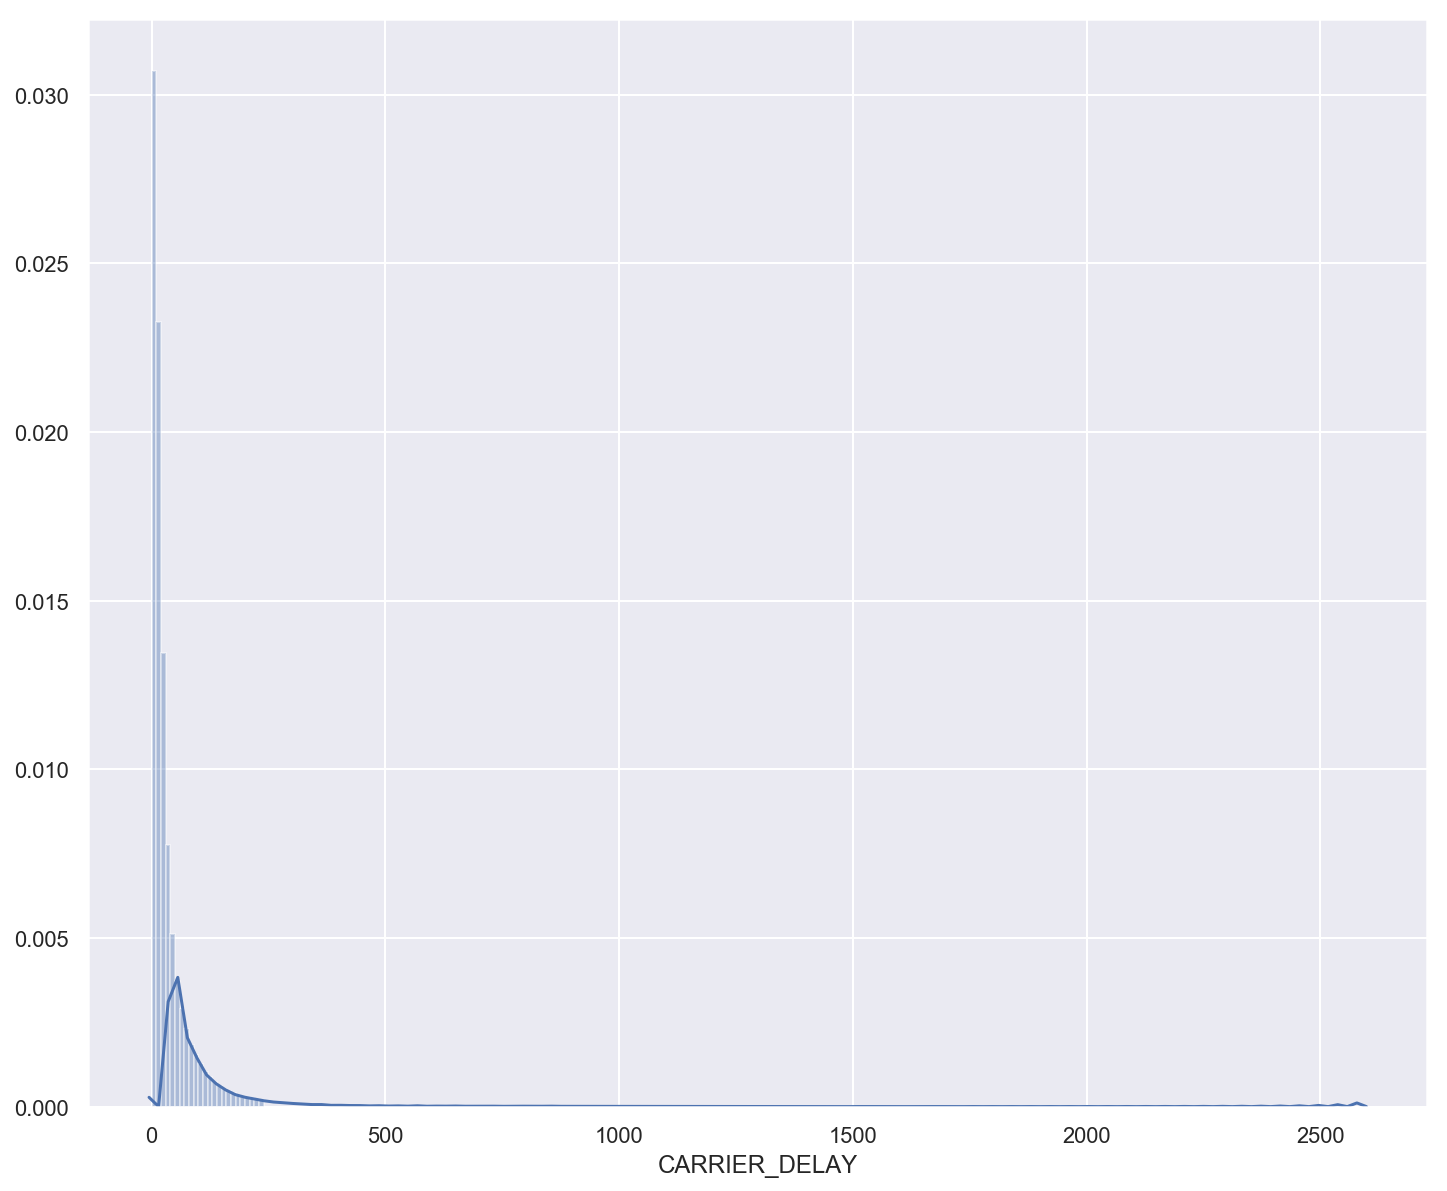

In [20]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(pop.CARRIER_DELAY.loc[(pop.ARR_DEL15 == 1) & (pop.CARRIER_DELAY != 0)], bins = range(0,250, 10))

In [ ]:
## Need to look into proportions t-test for comparing frequency of carrier delays between AA and Pop
## Need to look into ANOVA for comparing distribution of carrier delay times between AA and Pop

Looking a distribution of AA sample and total carrier population it doesn't appear to have a normal distribution. I believe we should use Welch's t-test to compare the means of the sample and population - specifically whether or not AA's avg carrier delay time is greater than the population's.

### Welch's t-Test

Recall that Welch's t-Test is given by  

# $ t = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{se_1^2+se_2^2}}$

where $\bar{X_i}$ , $s_i$, and $N_i$ are the sample mean, sample variance, and sample size, respectively, for sample i.

Write a function for calculatying Welch's t-statistic using two samples a, and b. To help, 2 potential samples are defined below.

> **Important Note**: While the formula does not indicate it, it is appropriate to take the absolute value of the t-value.

In [21]:
x1 = AA
x1sd = distribution.std()

NameError: name 'distribution' is not defined

In [22]:
def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)


In [23]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator


In [24]:
AA_C_Delays = AA.CARRIER_DELAY.loc[(AA.ARR_DEL15 == 1) & (AA.CARRIER_DELAY != 0)]
pop_C_Delays = pop.CARRIER_DELAY.loc[(pop.ARR_DEL15 == 1) & (pop.CARRIER_DELAY != 0)]  ## This is just a series...a slice of the original dataframe.




In [25]:
welch_t(AA_C_Delays, pop_C_Delays)

## Perhaps this result isn't meaningful because this test assumes a normal distribution, which we have not observed for this dataset.

11.109183455896684

In [26]:
welch_df(AA_C_Delays, pop_C_Delays)

68636.84369916336

In [27]:
t = welch_t(AA_C_Delays, pop_C_Delays)
dof = welch_df(AA_C_Delays, pop_C_Delays)

In [28]:
p = 1 - stats.t.cdf(t, dof)
print(p)

0.0


In [29]:
AA_C_Delays_df = pd.DataFrame(AA_C_Delays)

## Making stuff Logarithmic!!

In [30]:
## Since data is right-skewed, results of ANOVA (and related tests) may not be useful for data 'as-is' - going to
## transform to log-scale
AA_C_Delays_df['lognorm'] = np.log(AA_C_Delays_df.CARRIER_DELAY)
AA_C_Delays_df.head()

,CARRIER_DELAY,lognorm
147434,32.0,3.465736
147444,2.0,0.693147
147460,18.0,2.890372
147473,8.0,2.079442
147479,23.0,3.135494


Text(0.5, 0, 'Log(Delay Times) (minutes)')

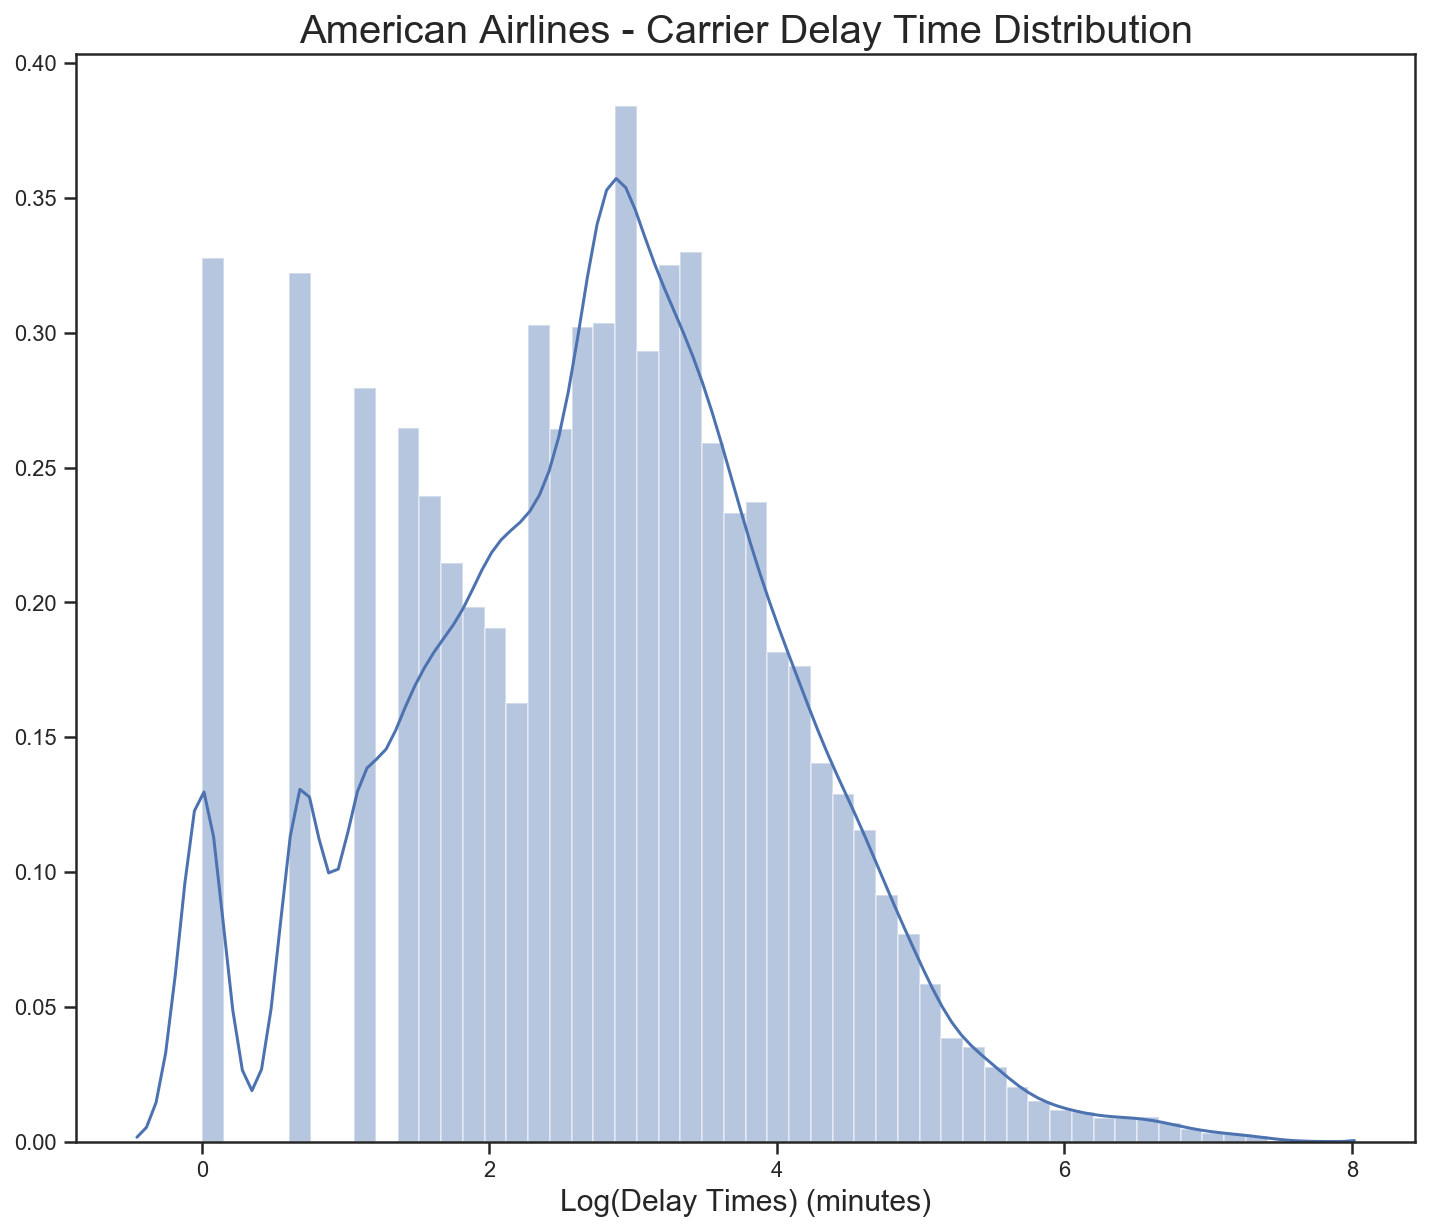

In [227]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.set_style("ticks", {"xtick.major.size":50, "ytick.major.size":50})
ax = sns.distplot(AA_C_Delays_df.lognorm)
ax.set_title('American Airlines - Carrier Delay Time Distribution', {'fontsize': 20,
        'fontweight' : 12,
        'verticalalignment': 'baseline'})
ax.set_xlabel('Log(Delay Times) (minutes)', fontdict={'fontsize' : 15})

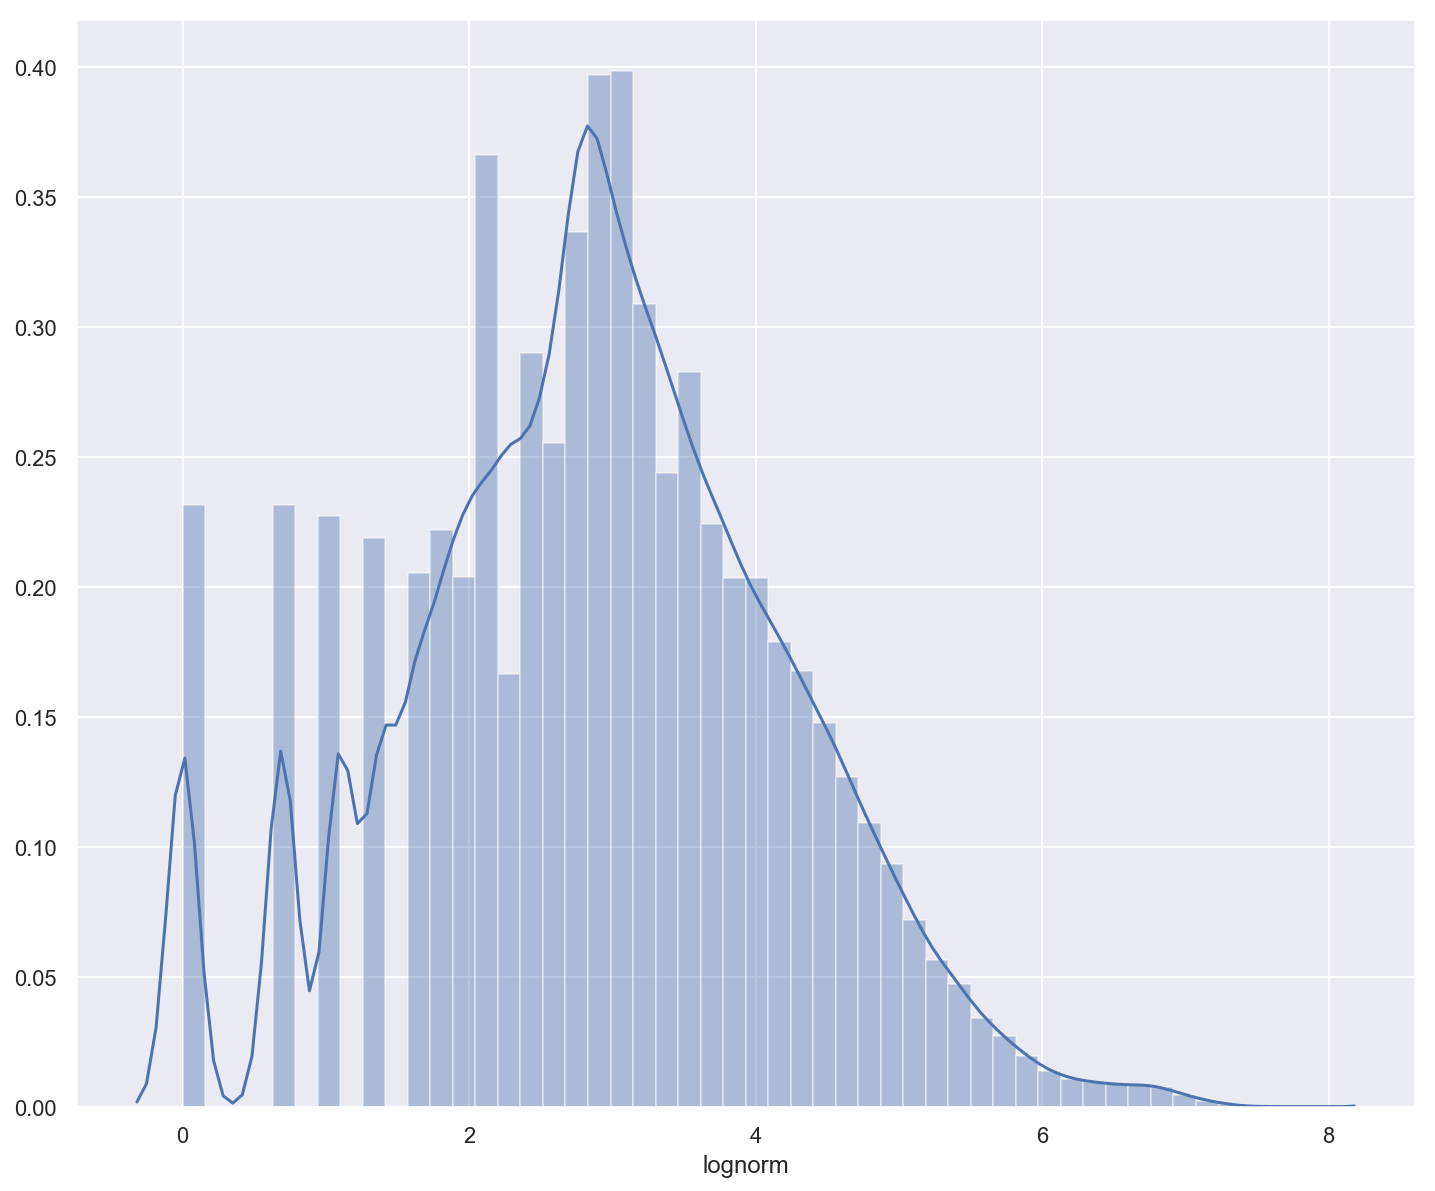

In [32]:
pop_C_Delays_df = pd.DataFrame(pop_C_Delays)
pop_C_Delays_df['lognorm'] = np.log(pop_C_Delays_df.CARRIER_DELAY)

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(pop_C_Delays_df.lognorm)

In [33]:
t_log = welch_t(AA_C_Delays_df['lognorm'], pop_C_Delays_df['lognorm'])


In [34]:
dof_log = welch_df(AA_C_Delays_df['lognorm'], pop_C_Delays_df['lognorm'])

In [35]:
p = 1 - stats.t.cdf(t_log, dof_log)
print(p)

0.0


## Resampling Time! 

In [ ]:
## After conversations with classmates, we've learned that for the Welch's t-test, we should apply a resampling method 

## Going to use the central limit theorem applied to non-zero carrier delays - to quantify difference in length of delay
## Hypothesis read as: "Given there is a carrier delay, is average carrier delay time greater for AA compared to the 16 other airlines"
## The subsetted data frames to use: "AA_C_Delays_df" & "pop_C_Delays_df"

In [236]:
def central_limit_theorem_plotter(distribution, sample_size, num_samples):
    sample_means = np.zeros(num_samples)
    pop_std = distribution.std()
    for idx, num in enumerate(range(num_samples)):
        sample = np.random.choice(distribution, size=sample_size, replace=True)
        sample_means[idx] = sample.mean()
    sns.set_style("ticks", {"xtick.major.size":50, "ytick.major.size":50})
    ax = sns.distplot(sample_means, bins=50, kde=True)
    title = 'Sample Distribution n = {} and number of samples = {}, std error = {}'.format(
        sample_size, num_samples, round((pop_std/num_samples), ndigits = 3))
    ax.set_xlabel('Sample Mean Delay Times (minutes)', fontdict={'fontsize' : 15})
    print('mean = {}'.format(sample_means.mean()))
    plt.title(title, {'fontsize': 20,
        'fontweight' : 12,
        'verticalalignment': 'baseline'})
    return sample_means



mean = 38.1876816


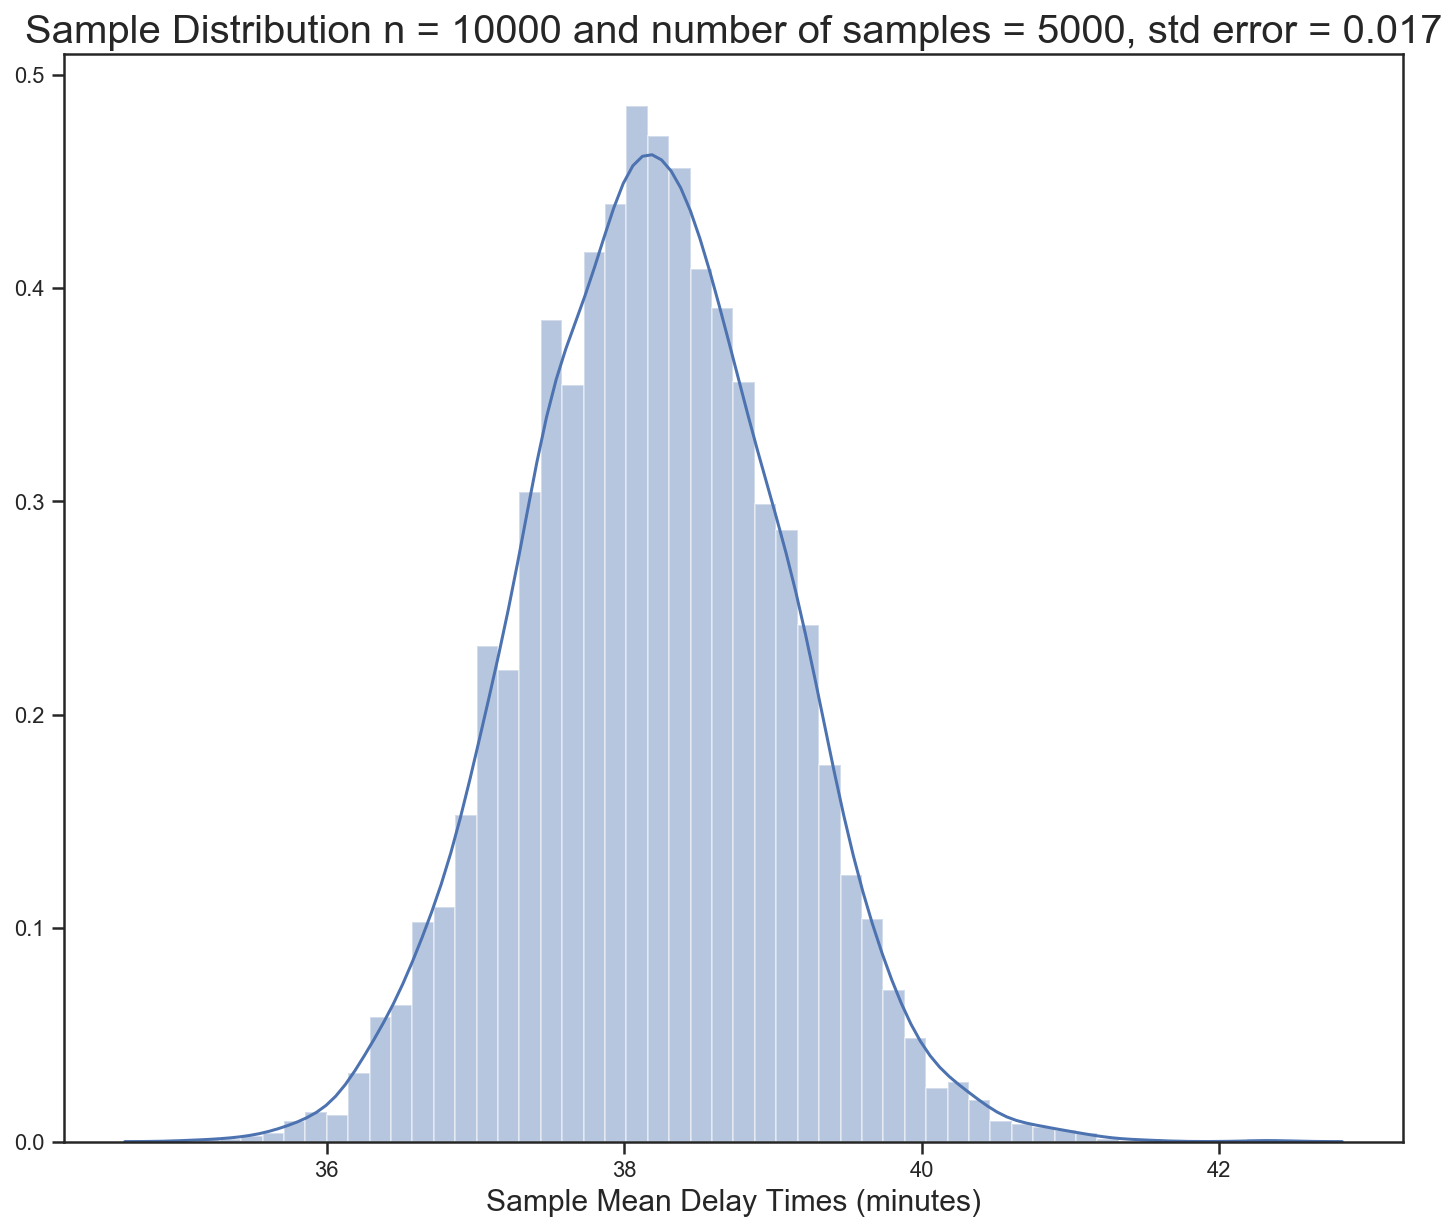

In [237]:
AA_RSM = central_limit_theorem_plotter(AA_C_Delays_df.CARRIER_DELAY, 10000, 5000) ## RSM = Random Sample Means

mean = 42.868611699999995


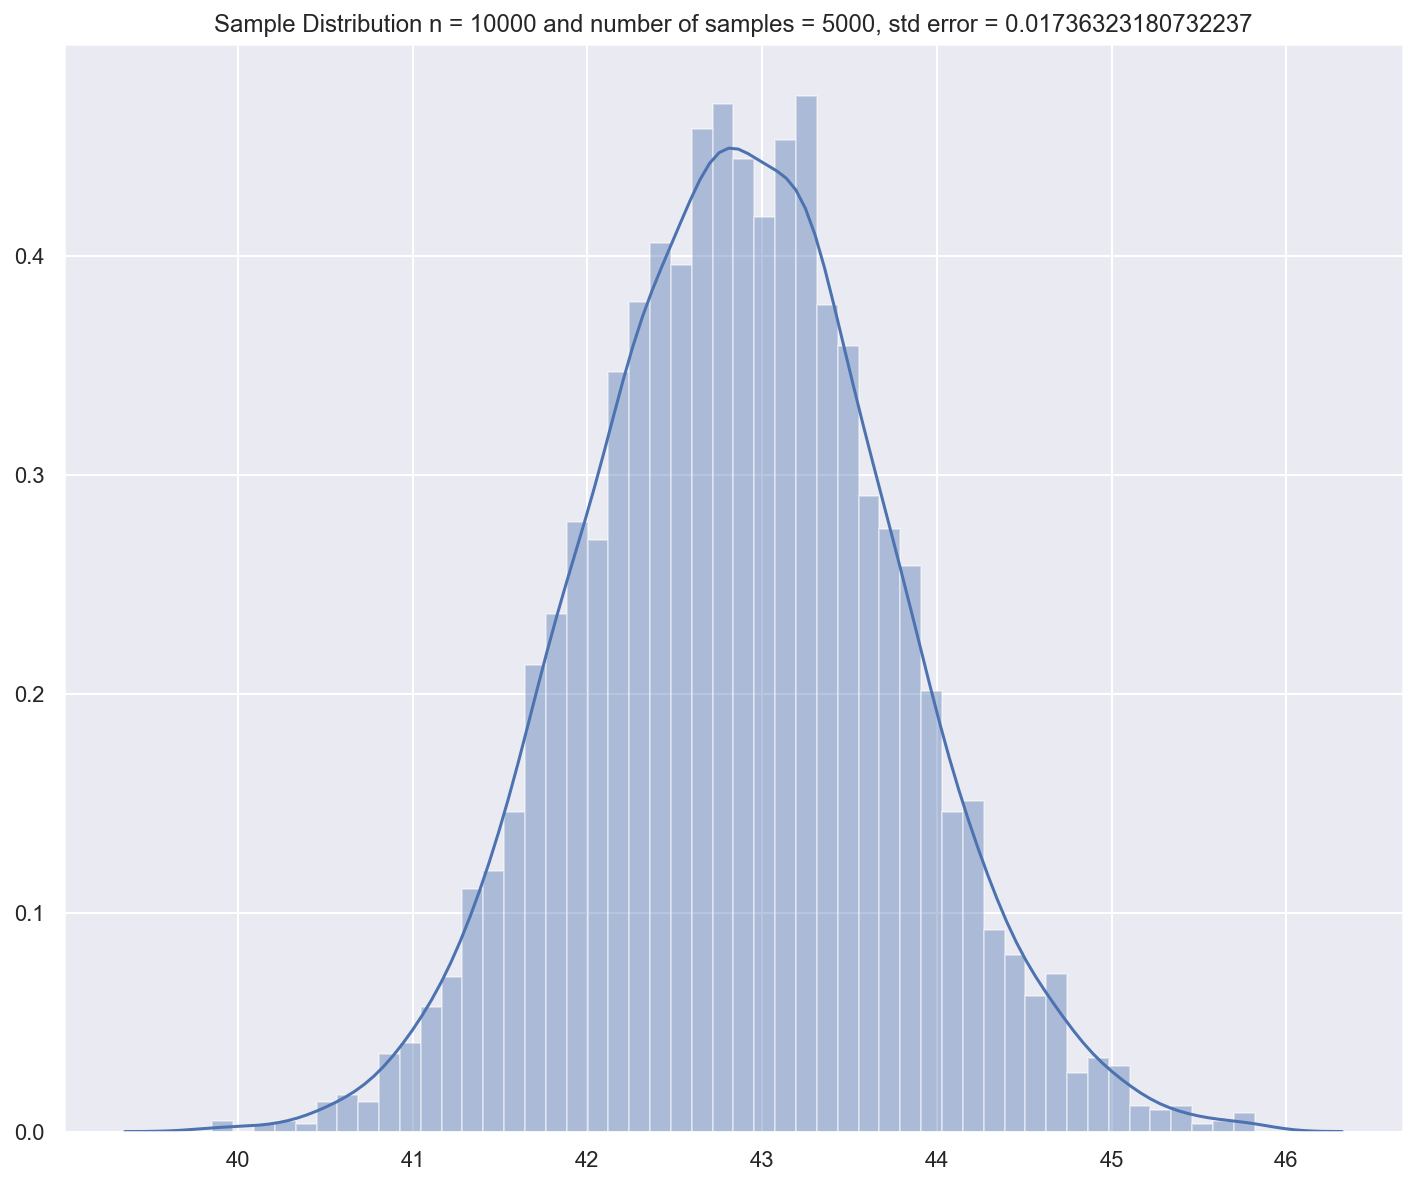

In [38]:
pop_RSM = central_limit_theorem_plotter(pop_C_Delays_df.CARRIER_DELAY, 10000, 5000)

In [39]:
t_RSM = welch_t(AA_RSM, pop_RSM)
print(t_RSM)

270.23895507604834


In [40]:
dof_RSM = welch_df(AA_RSM, pop_RSM)

In [41]:
p = 1 - stats.t.cdf(t_RSM, dof_RSM)
print(p)

0.0


Let's try using scipy instead of brute force calculation!

In [42]:
stats.ttest_ind(pop_RSM, AA_RSM, equal_var=False)

Ttest_indResult(statistic=270.23895507604834, pvalue=0.0)

A good result! - The large t-value shows that there is a statistical difference between the two means.

Now we can use Cohen's D to quanitfy the size of that difference.
This answers the question - is it just a small effect that never happens, or a large effect that never happens...


### Cohen's $d$, standardized metrics for effect size
Cohen’s $d$ is one of the most common ways to measure effect size. As an effect size, Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable.

$d$ = effect size (difference of means) / pooled standard deviation;

$d = \frac{\mu1 - \mu2}{\sigma pooled}$

In [43]:
def cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number

    diff = group1.mean() - group2.mean()

    n1 = len(group1)
    n2 = len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)

    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)

    return d

In [44]:
cohen_d(AA_RSM, pop_RSM)

-5.40531966051632

With a Cohen's d of 5.49, 100 % of the treatment group will be above the mean of the control group (Cohen's U3

### Subsetting to compare to major US Carriers:


In [148]:
names_to_map = airline_names.loc[airline_names.UNIQUE_CARRIER.isin(list(df.OP_UNIQUE_CARRIER.unique()))] ## Filtering down list of all airlines reported to just those in this dataset

names_to_map = names_to_map.rename(columns = {"UNIQUE_CARRIER":"OP_UNIQUE_CARRIER"})
names_to_map.set_index(['OP_UNIQUE_CARRIER'], inplace = True)
names_to_map.index

Index(['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'UA', 'WN', 'YV', 'YX'],
      dtype='object', name='OP_UNIQUE_CARRIER')

In [46]:
top_3_nonAA = pop.loc[(pop.OP_UNIQUE_CARRIER.isin(['DL', 'WN', 'UA']))]  ## Returns 1,429,351 rows

In [47]:
top_3_nonAA_DELAY = top_3_nonAA.loc[(top_3_nonAA.ARR_DEL15 == 1) & (top_3_nonAA.CARRIER_DELAY != 0)] ## Specifically top 3 non-AA airlines, with at least 15min delay, and some part of that due to carrier. 

In [55]:
type(top_3_nonAA_DELAY)

pandas.core.frame.DataFrame

## Method Review: 

- Isolated key data of interest (Carrier_Delay)
- Resample this data using "central limit theorem plotter" function
- Save resampled distribution as variable
- Use saved var in Welchs_t, Welchs_df, and P functions. Then compare to using |stats.ttest_ind(group1, group2, equal_var=False)
- Use Cohen's D to find how different they are

mean = 34.254571479999996


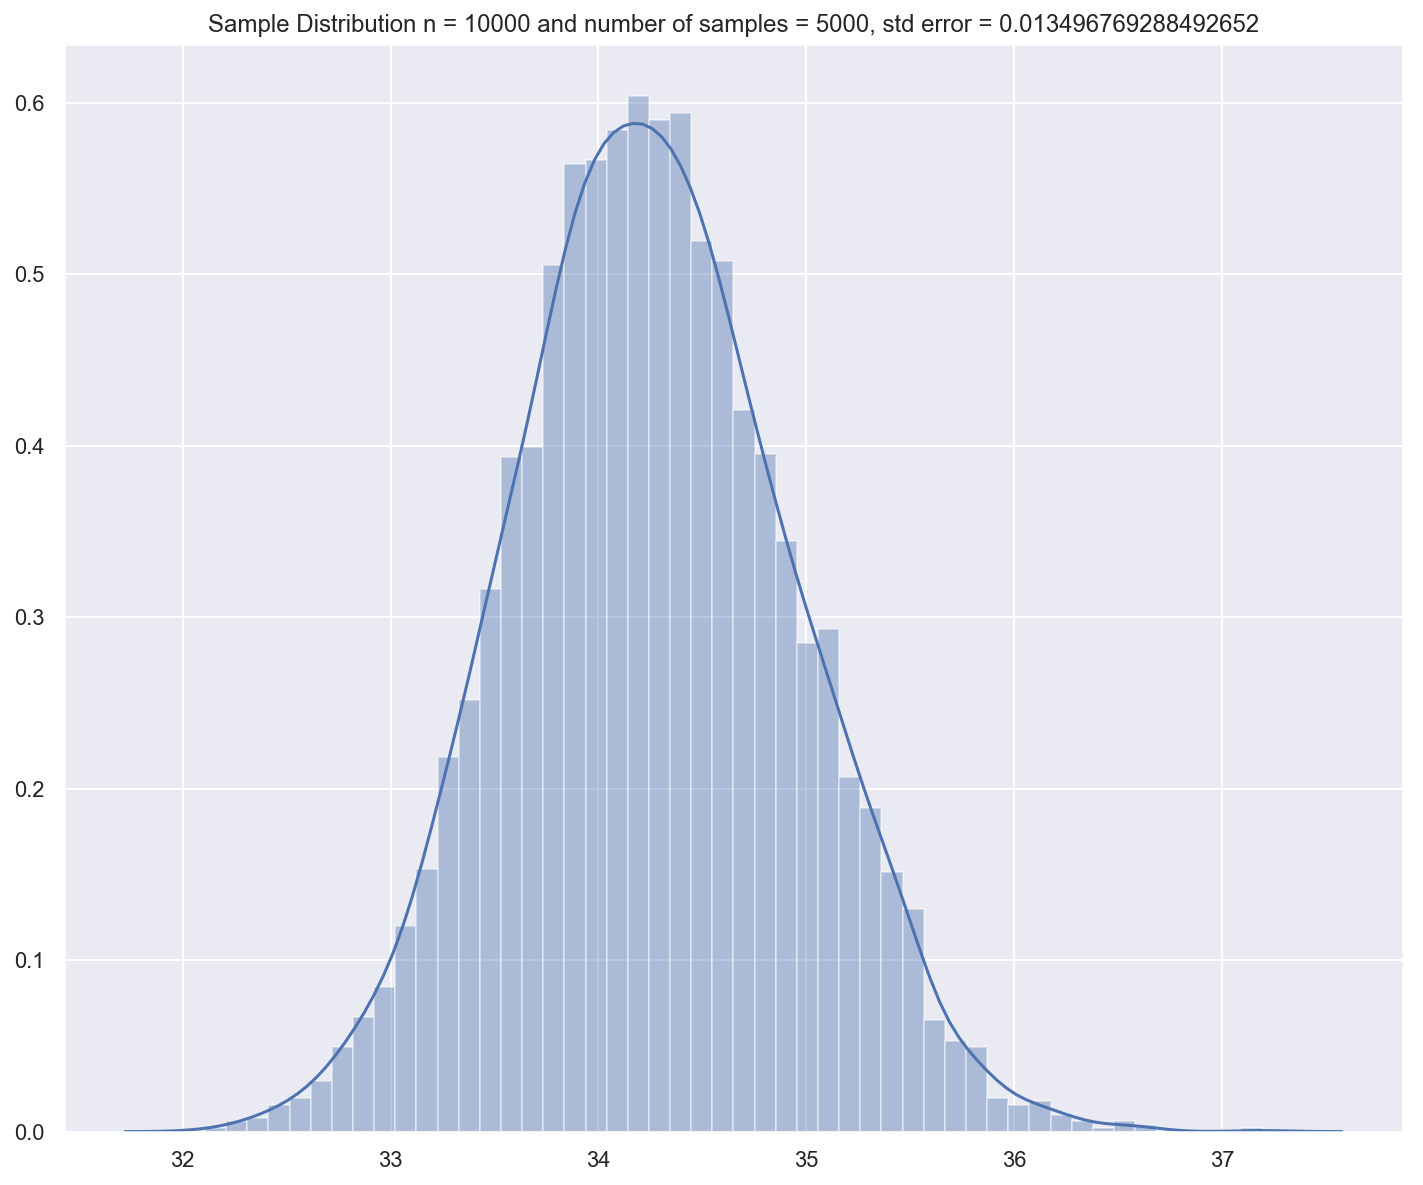

In [48]:
top_3_nonAA_DELAY_RSM = central_limit_theorem_plotter(top_3_nonAA_DELAY.CARRIER_DELAY, 10000, 5000)

In [49]:
t_AA_vs_Top3 = welch_t(AA_RSM, top_3_nonAA_DELAY_RSM)
print(t_AA_vs_Top3)

259.49212794562175


In [50]:
dof_AA_vs_Top3 = welch_df(AA_RSM, top_3_nonAA_DELAY_RSM)
print(dof_AA_vs_Top3)

9470.287176183272


In [51]:
p = 1 - stats.t.cdf(t_AA_vs_Top3, dof_AA_vs_Top3)
print(p)

0.0


In [52]:
stats.ttest_ind(AA_RSM, top_3_nonAA_DELAY_RSM, equal_var=False)

Ttest_indResult(statistic=259.49212794562175, pvalue=0.0)

In [53]:
cohen_d(AA_RSM, top_3_nonAA_DELAY_RSM)

5.1903616210289405

## For tomorrow: 

Possible questions to explore: 
    - Which airline is best 
    - Which is worst
    (get means of each airline by resampling (use for loop))
    
-Can we use ANOVA to compare AA to each of the respective TOP 3 carriers

-Plot of overlapping resampled distributions, to highlight info from Cohen's D. 

In [64]:

#central_limit_theorem_plotter(top_3_nonAA_DELAY.CARRIER_DELAY, 10000, 5000)

def central_limit_theorem_mean(distribution, sample_size, num_samples):  ## distribution must be an array (df.CARRIER_DELAY)
    sample_means = np.zeros(num_samples)
    pop_std = distribution.std()
    for idx, num in enumerate(range(num_samples)):
        sample = np.random.choice(distribution, size=sample_size, replace=True)
        sample_means[idx] = sample.mean()
    #sns.distplot(sample_means, bins=50, kde=True)
    #title = 'Sample Distribution n = {} and number of samples = {}, std error = {}'.format(
        #sample_size, num_samples, pop_std/num_samples)
#     print('mean = {}'.format(sample_means.mean()))
#     plt.title(title)
    return sample_means.mean()



In [75]:
central_limit_theorem_mean(pop.loc[mask].CARRIER_DELAY, 10000, 5000)

29.369482679999997

In [74]:
## Testing mask to filter on individual airlines with Delays (at least 15min) and Carrier Delays, ignoring NAN values

mask = (pop.OP_UNIQUE_CARRIER == 'WN') & (pop.DEP_DEL15 == 1) & (pop.CARRIER_DELAY != 0) & (pop.CARRIER_DELAY.isna() == False)
pop.loc[mask]



,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
95004,2019,2,4,10,3,2019-04-10,WN,19393,29.0,29.0,1.0,24.0,24.0,1.0,1.0,1900-1959,0.0,NaN,0.0,24.0,0.0,0.0,0.0,0.0
95016,2019,2,4,10,3,2019-04-10,WN,19393,16.0,16.0,1.0,16.0,16.0,1.0,1.0,2300-2359,0.0,NaN,0.0,16.0,0.0,0.0,0.0,0.0
95028,2019,2,4,10,3,2019-04-10,WN,19393,17.0,17.0,1.0,20.0,20.0,1.0,1.0,0900-0959,0.0,NaN,0.0,17.0,0.0,3.0,0.0,0.0
95042,2019,2,4,10,3,2019-04-10,WN,19393,25.0,25.0,1.0,19.0,19.0,1.0,1.0,1600-1659,0.0,NaN,0.0,1.0,0.0,0.0,0.0,18.0
95108,2019,2,4,10,3,2019-04-10,WN,19393,26.0,26.0,1.0,17.0,17.0,1.0,1.0,1600-1659,0.0,NaN,0.0,17.0,0.0,0.0,0.0,0.0
95145,2019,2,4,10,3,2019-04-10,WN,19393,21.0,21.0,1.0,30.0,30.0,1.0,2.0,1600-1659,0.0,NaN,0.0,10.0,0.0,9.0,0.0,11.0
95165,2019,2,4,10,3,2019-04-10,WN,19393,34.0,34.0,1.0,32.0,32.0,1.0,2.0,1800-1859,0.0,NaN,0.0,11.0,0.0,0.0,0.0,21.0
95170,2019,2,4,10,3,2019-04-10,WN,19393,36.0,36.0,1.0,37.0,37.0,1.0,2.0,1800-1859,0.0,NaN,0.0,6.0,0.0,1.0,0.0,30.0
95185,2019,2,4,10,3,2019-04-10,WN,19393,68.0,68.0,1.0,74.0,74.0,1.0,4.0,2000-2059,0.0,NaN,0.0,10.0,0.0,6.0,0.0,58.0
95243,2019,2,4,10,3,2019-04-10,WN,19393,34.0,34.0,1.0,23.0,23.0,1.0,1.0,1600-1659,0.0,NaN,0.0,23.0,0.0,0.0,0.0,0.0


In [76]:
## This returns the resampled means of each individual airline reported in the dataset.

mean_carrier_delay_airlines = {}
for airline in names_to_map.UNIQUE_CARRIER:
    mask = (pop.OP_UNIQUE_CARRIER == airline) & (pop.DEP_DEL15 == 1) & (pop.CARRIER_DELAY != 0) & (pop.CARRIER_DELAY.isna() == False)
    temp = pop.loc[mask]
    temp_mean = central_limit_theorem_mean(temp.CARRIER_DELAY, 10000, 5000)
    mean_carrier_delay_airlines[airline] = temp_mean

print(mean_carrier_delay_airlines)

{'9E': 52.18431974, 'AS': 48.886632660000004, 'B6': 42.8619264, 'DL': 51.2388882, 'EV': 74.49622144, 'F9': 40.1205862, 'G4': 63.807276040000005, 'HA': 38.51181158, 'MQ': 41.1453066, 'NK': 42.958650219999996, 'OH': 36.53148759999999, 'OO': 99.82343808, 'UA': 42.41329084, 'WN': 29.357389620000003, 'YV': 64.96617658000001, 'YX': 46.20802382}


In [135]:
## Redoing above cell to include AA, and mapping names of airlines to dataframe

mean_carrier_delay_airlines_all = {}
for airline in names_to_map.UNIQUE_CARRIER:
    mask = (df.OP_UNIQUE_CARRIER == airline) & (df.DEP_DEL15 == 1) & (df.CARRIER_DELAY != 0) & (df.CARRIER_DELAY.isna() == False)
    temp = df.loc[mask]
    temp_mean = central_limit_theorem_mean(temp.CARRIER_DELAY, 10000, 5000)
    mean_carrier_delay_airlines_all[airline] = temp_mean

print(mean_carrier_delay_airlines_all)

{'9E': 52.165738600000005, 'AA': 44.905926179999994, 'AS': 48.89530674, 'B6': 42.87537808, 'DL': 51.23272008000001, 'EV': 74.49753818, 'F9': 40.1115194, 'G4': 63.806467739999995, 'HA': 38.506328159999995, 'MQ': 41.160599760000004, 'NK': 42.99752058, 'OH': 36.5536975, 'OO': 99.78125792, 'UA': 42.4229474, 'WN': 29.35203554, 'YV': 64.9023974, 'YX': 46.18421298}


In [143]:
mean_CarrierDelay_all_df = pd.DataFrame(data = mean_carrier_delay_airlines_all.values(), columns = ['Mean Carrier Delay'], index = mean_carrier_delay_airlines_all.keys())

mean_CarrierDelay_all_df

,Mean Carrier Delay
9E,52.165739
AA,44.905926
AS,48.895307
B6,42.875378
DL,51.232720
EV,74.497538
F9,40.111519
G4,63.806468
HA,38.506328
MQ,41.160600


In [156]:
consol_df = mean_CarrierDelay_all_df.merge(names_to_map, how = 'outer', left_index = True, right_index = True)

In [157]:
consol_df

,Mean Carrier Delay,Description
9E,52.165739,Endeavor Air Inc.
AA,44.905926,American Airlines Inc.
AS,48.895307,Alaska Airlines Inc.
B6,42.875378,JetBlue Airways
DL,51.232720,Delta Air Lines Inc.
EV,74.497538,ExpressJet Airlines LLC
F9,40.111519,Frontier Airlines Inc.
G4,63.806468,Allegiant Air
HA,38.506328,Hawaiian Airlines Inc.
MQ,41.160600,Envoy Air


Want boxplot of each airlines carrier delay time stacked on top of each other

In [ ]:
## Formatting Barplot:

for item in consol_df.get_xticklabels():
    item.set_rotation(45)

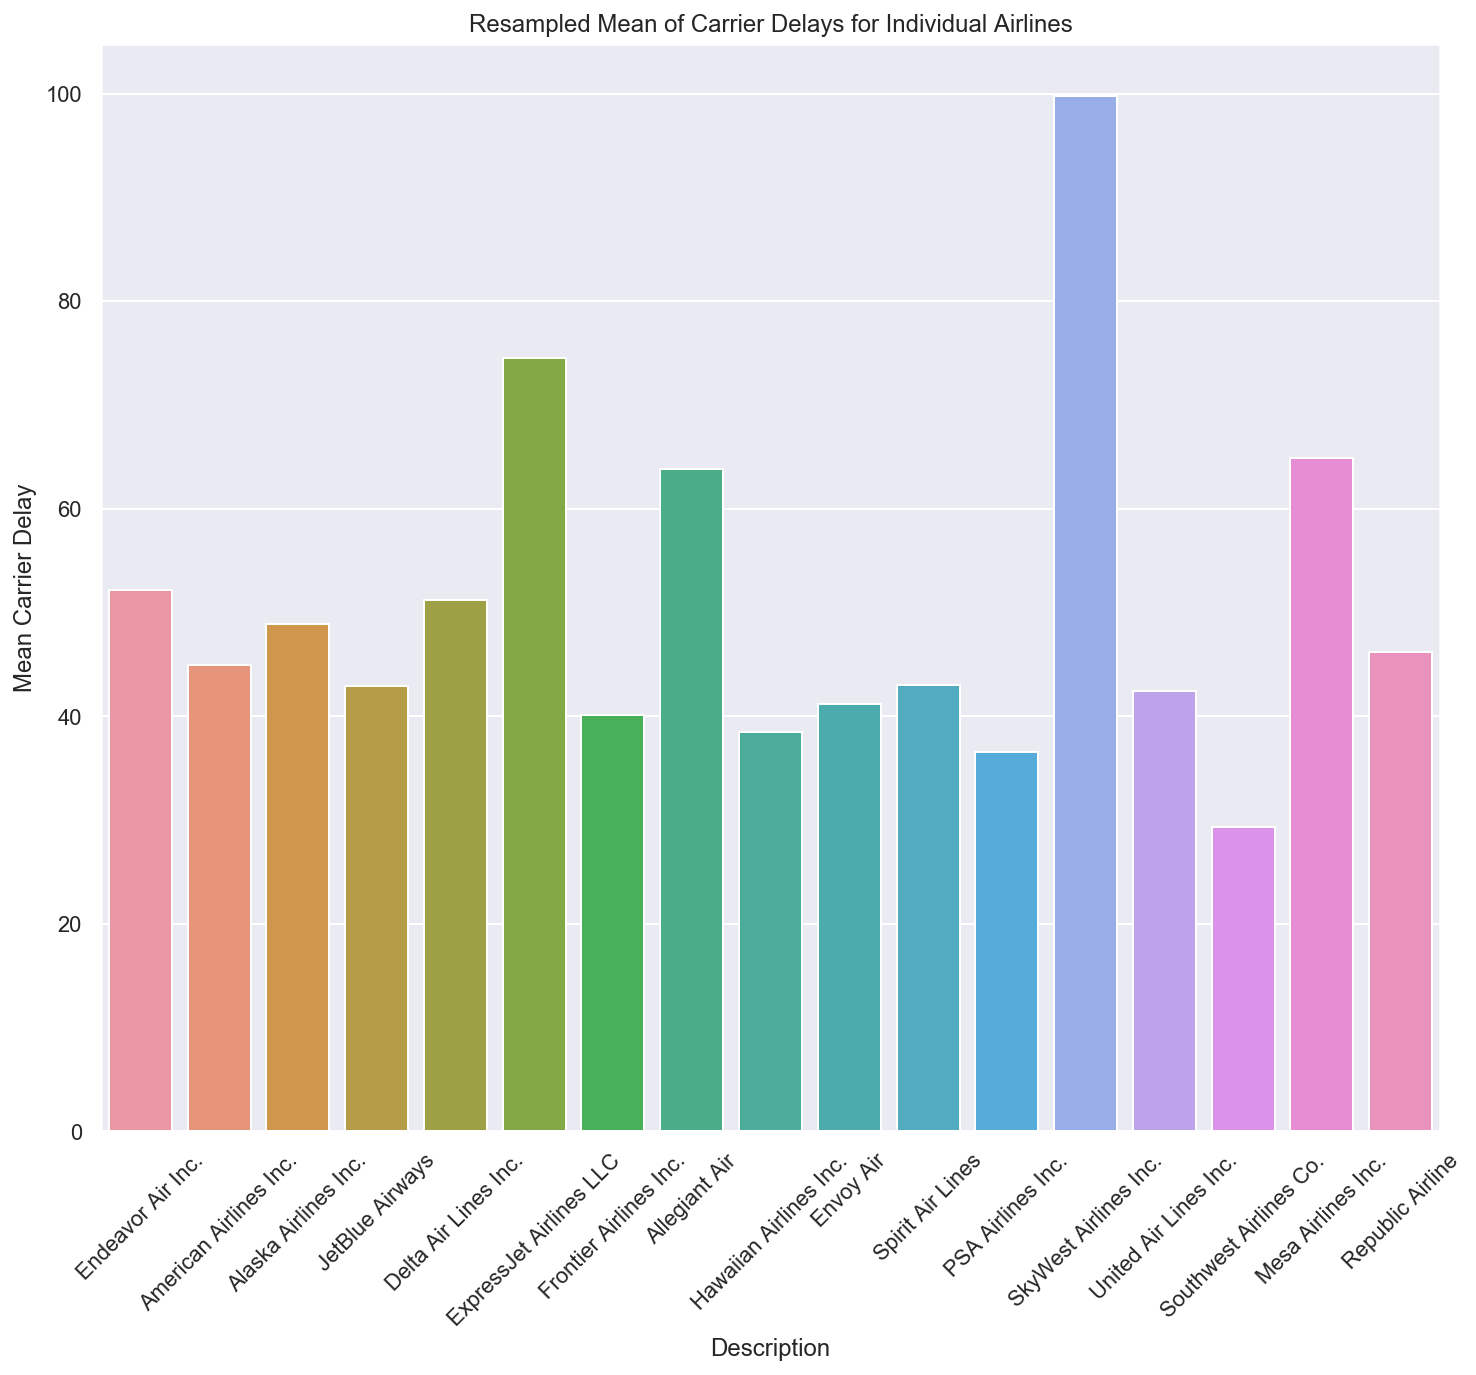

In [201]:
plot = sns.barplot(x = consol_df.Description, y = consol_df['Mean Carrier Delay']) ## Missing American Airlines
plot.set_title('Resampled Mean of Carrier Delays for Individual Airlines')
for item in plot.get_xticklabels():
    item.set_rotation(45)
    



Want a resampled distribution of the 3 groups - AA, Top 3, Everyone else

In [81]:
## Filtering out Top3 and AA to get everyother airline separate

everyone_else = pop.loc[(~pop.OP_UNIQUE_CARRIER.isin(['DL', 'WN', 'UA', 'AA']))] 
everyone_else.OP_UNIQUE_CARRIER.unique() ## Checked to see that we have filtered correctly

mask2 = (everyone_else.DEP_DEL15 == 1) & (everyone_else.CARRIER_DELAY != 0) & (everyone_else.CARRIER_DELAY.isna() == False)

everyone_else_DELAY = everyone_else.loc[mask2]

mean = 56.81960952


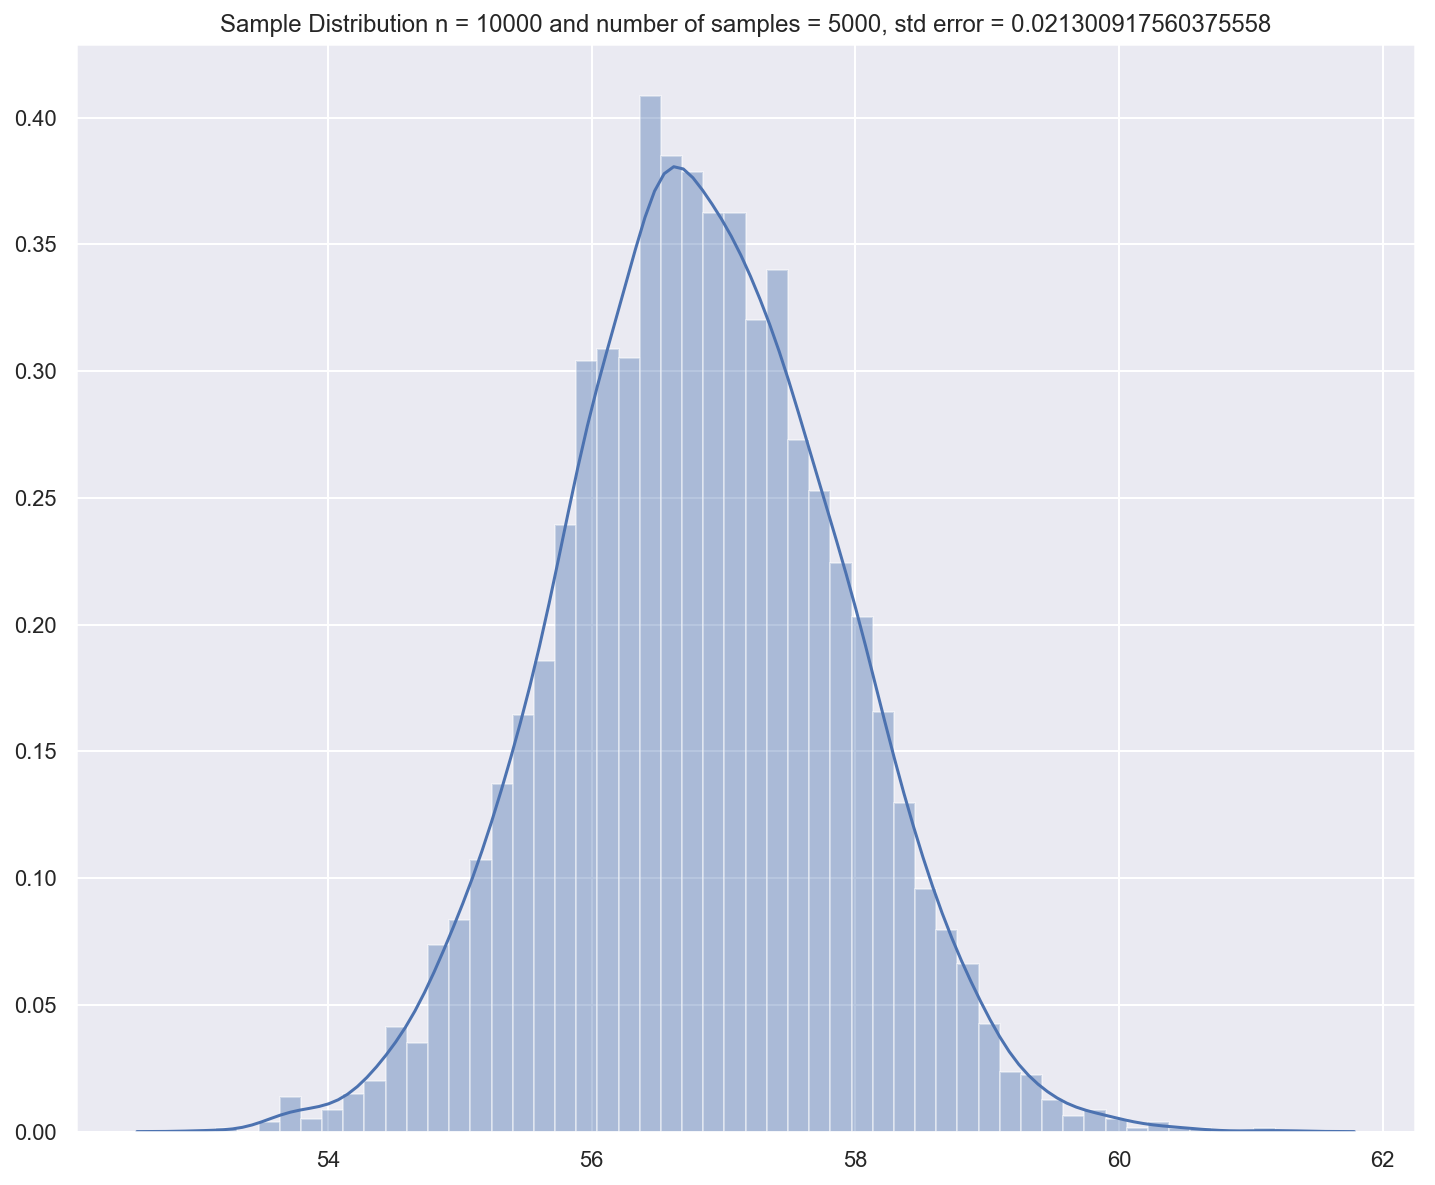

In [83]:
everyone_else_DELAY_RSM = central_limit_theorem_plotter(everyone_else_DELAY.CARRIER_DELAY, 10000, 5000)

In [ ]:
top_3_nonAA_DELAY_RSM
AA_RSM
everyone_else_DELAY_RSM
UA_DELAY_RSM
WN_DELAY_RSM 
DL_DELAY_RSM

NameError: name 'sample_size' is not defined

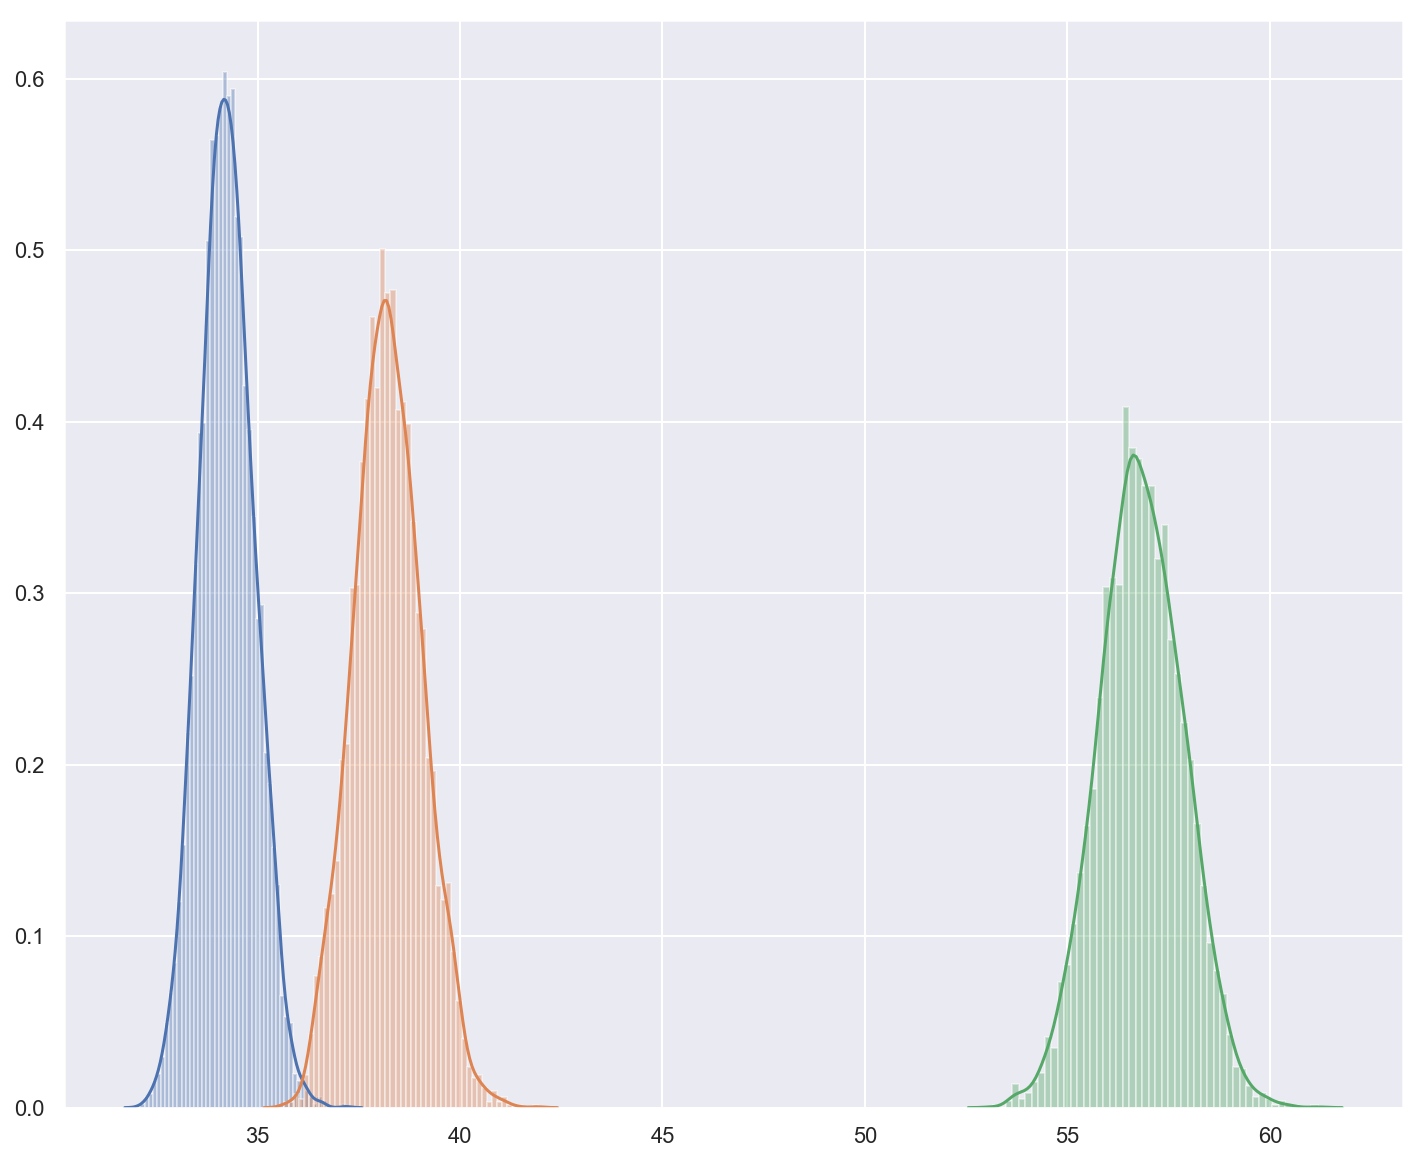

In [86]:
sns.distplot(top_3_nonAA_DELAY_RSM, bins=50, kde=True)
sns.distplot(AA_RSM, bins=50, kde=True)
sns.distplot(everyone_else_DELAY_RSM, bins=50, kde=True)
# title = 'Sample Distributions n = {} and number of samples = {}, std error = {}'.format(
#         sample_size, num_samples, pop_std/num_samples)
# print('mean = {}'.format(sample_means.mean()))
# plt.title(title)

mean = 51.236276059999994


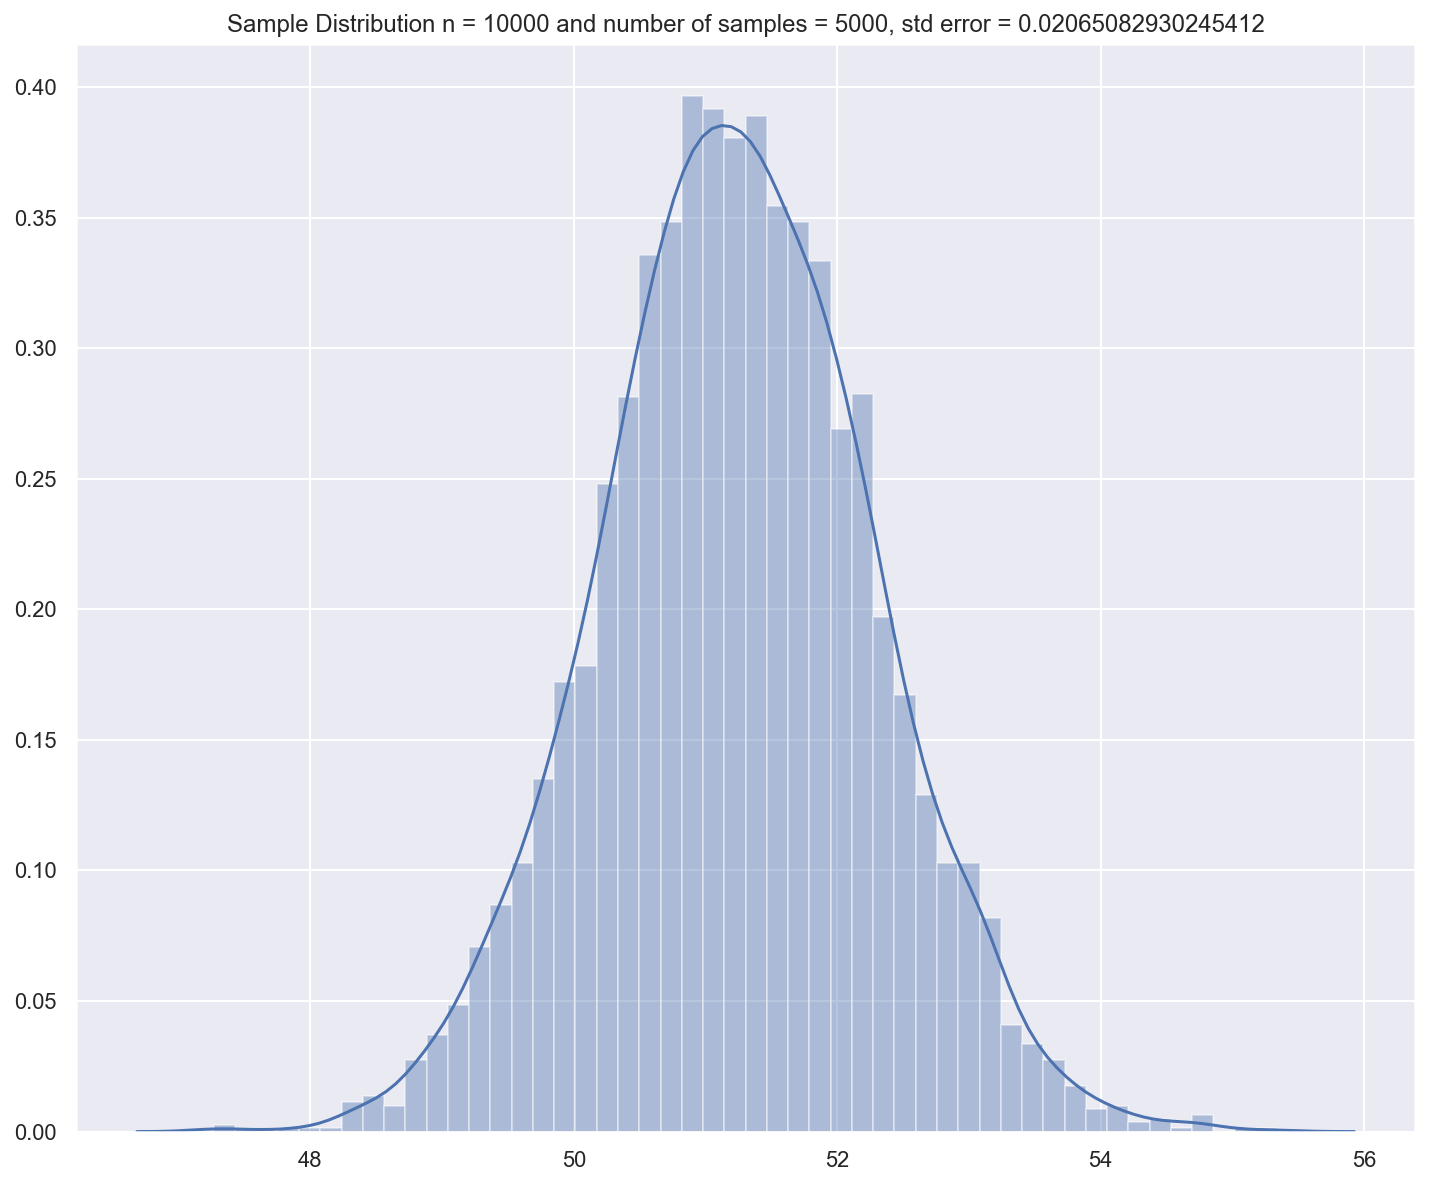

In [87]:
## Now want to separate top 3 out individually

DL = pop.loc[(pop.OP_UNIQUE_CARRIER == 'DL')] 
##everyone_else.OP_UNIQUE_CARRIER.unique() ## Checked to see that we have filtered correctly
mask3 = (DL.DEP_DEL15 == 1) & (DL.CARRIER_DELAY != 0) & (DL.CARRIER_DELAY.isna() == False)
DL_DELAY = DL.loc[mask3]
DL_DELAY_RSM = central_limit_theorem_plotter(DL_DELAY.CARRIER_DELAY, 10000, 5000)

mean = 29.36658798


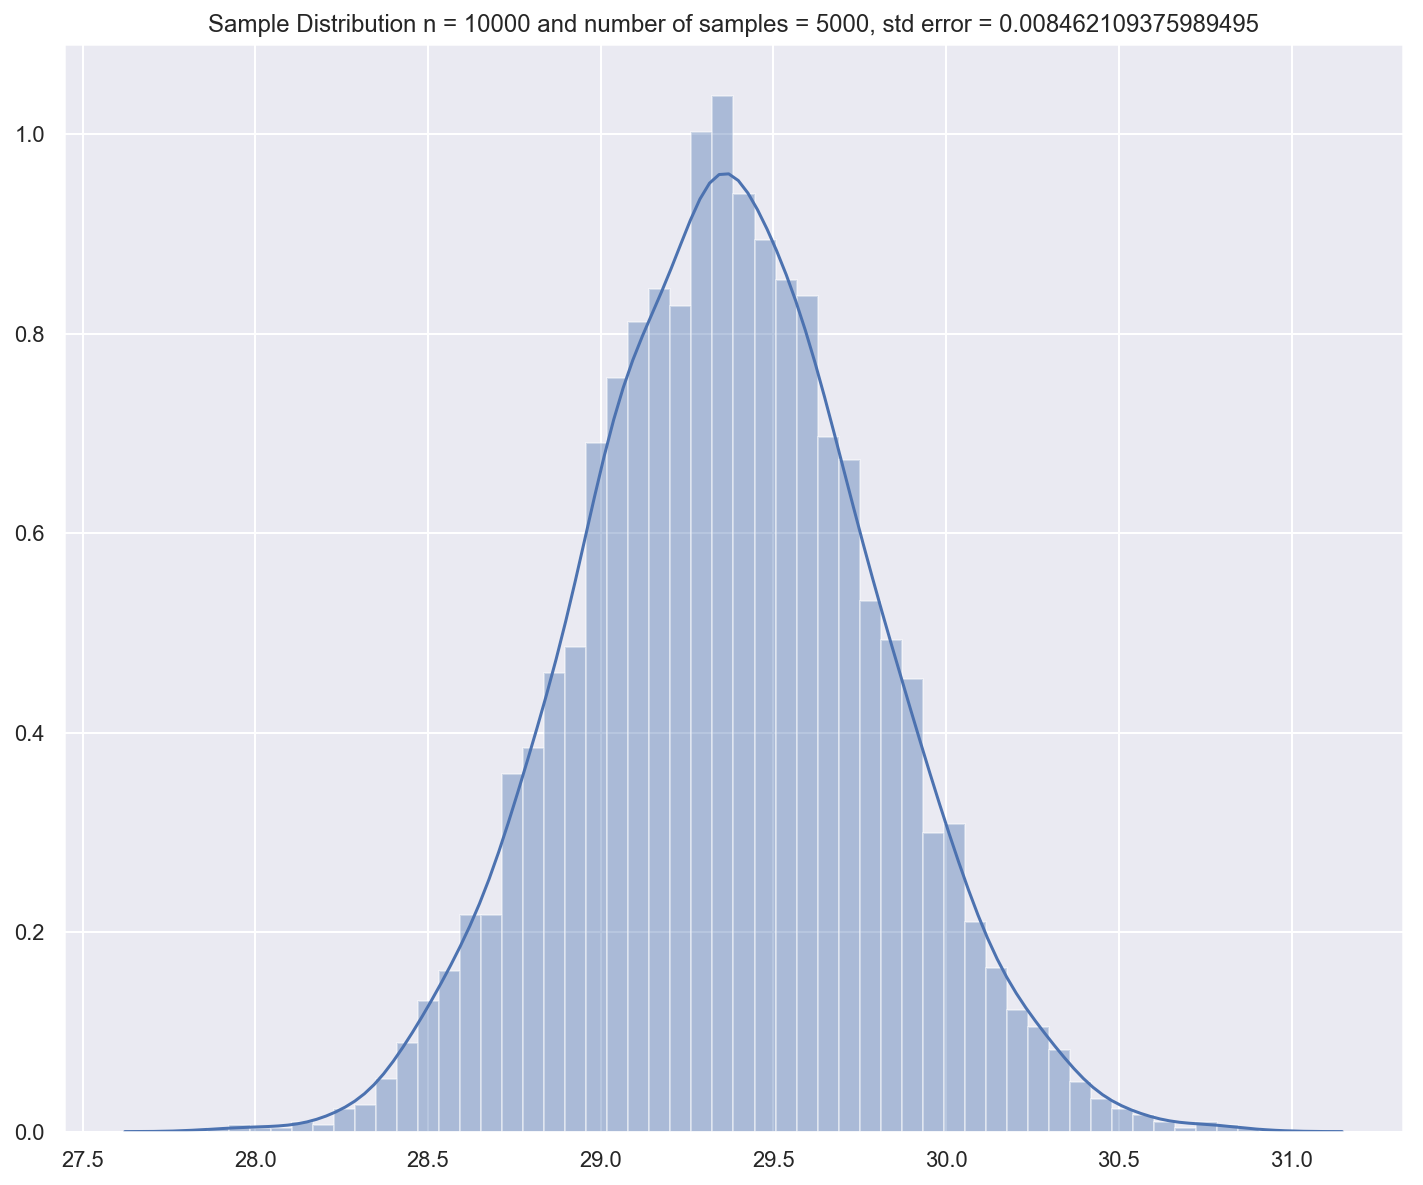

In [88]:
WN = pop.loc[(pop.OP_UNIQUE_CARRIER == 'WN')] 
##everyone_else.OP_UNIQUE_CARRIER.unique() ## Checked to see that we have filtered correctly
mask4 = (WN.DEP_DEL15 == 1) & (WN.CARRIER_DELAY != 0) & (WN.CARRIER_DELAY.isna() == False)
WN_DELAY = WN.loc[mask4]
WN_DELAY_RSM = central_limit_theorem_plotter(WN_DELAY.CARRIER_DELAY, 10000, 5000)

mean = 42.39630254000001


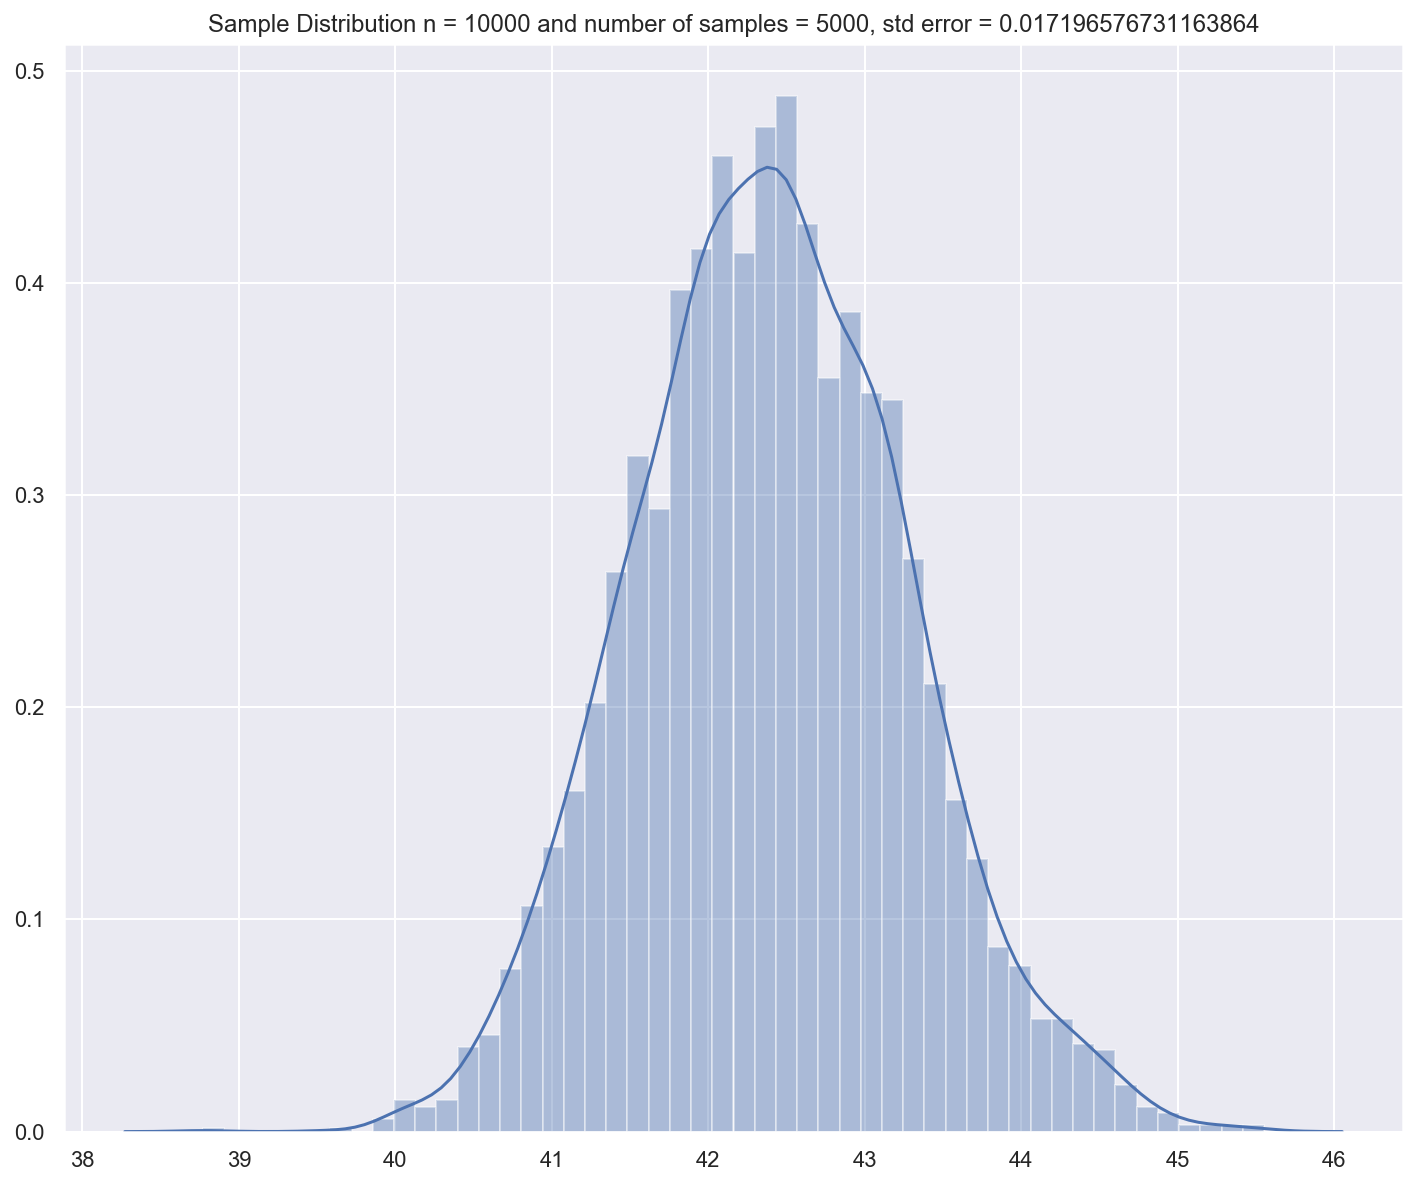

In [89]:
UA = pop.loc[(pop.OP_UNIQUE_CARRIER == 'UA')] 
##everyone_else.OP_UNIQUE_CARRIER.unique() ## Checked to see that we have filtered correctly
mask5 = (UA.DEP_DEL15 == 1) & (UA.CARRIER_DELAY != 0) & (UA.CARRIER_DELAY.isna() == False)
UA_DELAY = UA.loc[mask5]
UA_DELAY_RSM = central_limit_theorem_plotter(UA_DELAY.CARRIER_DELAY, 10000, 5000)

In [101]:
top_3_nonAA_DELAY_RSM
AA_RSM
everyone_else_DELAY_RSM
UA_DELAY_RSM
WN_DELAY_RSM 
DL_DELAY_RSM

array([50.3775, 52.5832, 47.2688, ..., 50.1765, 51.6667, 51.7899])

In [103]:
AA_RSM_df = pd.DataFrame(AA_RSM)
AA_RSM_df.head()

,0
0,39.6282
1,39.0620
2,38.4046
3,37.9733
4,38.9008


## Figure 1

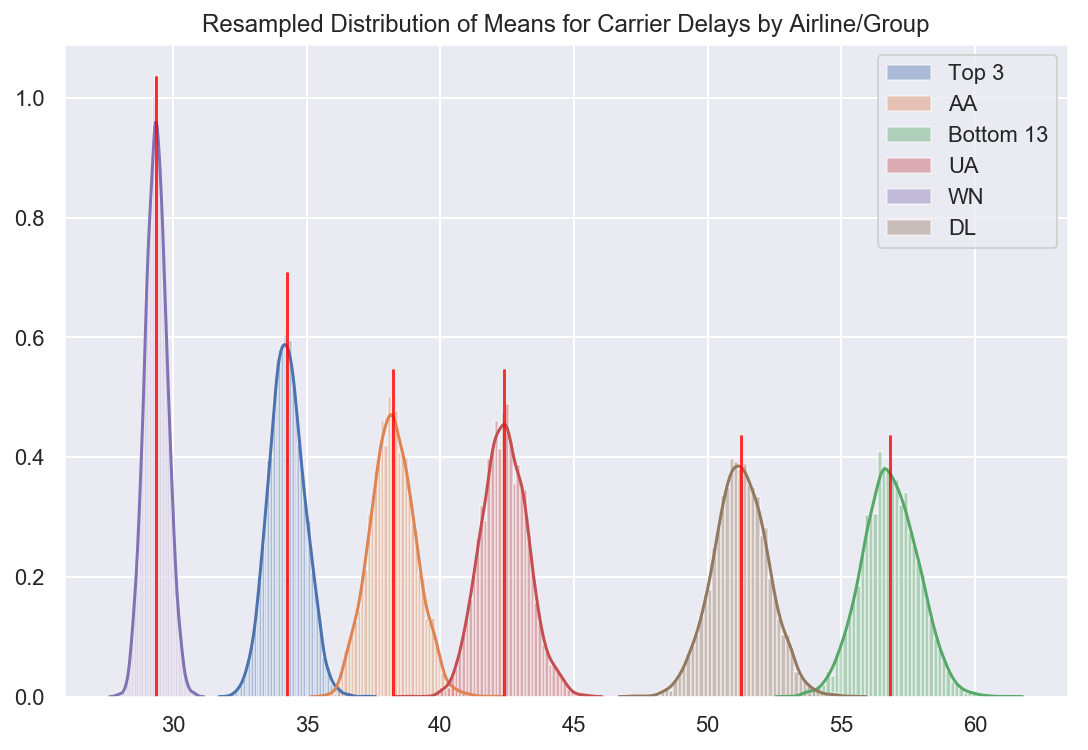

In [172]:
#f, ax = plt.subplots(1, 1)
plt.figure(figsize=(9,6))

ax = sns.distplot(top_3_nonAA_DELAY_RSM, bins=50, kde=True, label = 'Top 3')
ax = sns.distplot(AA_RSM, bins=50, kde=True, label = 'AA')
ax = sns.distplot(everyone_else_DELAY_RSM, bins=50, kde=True, label = 'Bottom 13')
ax = sns.distplot(UA_DELAY_RSM, bins=50, kde=True, label = 'UA')
ax = sns.distplot(WN_DELAY_RSM , bins=50, kde=True, label = 'WN')
ax = sns.distplot(DL_DELAY_RSM, bins=50, kde=True, label = 'DL')
#sns.set(context='talk')
ax.set_title('Resampled Distribution of Means for Carrier Delays by Airline/Group')

plt.axvline(top_3_nonAA_DELAY_RSM.mean(), 0, .65, color='red', alpha=.8)
plt.axvline(AA_RSM.mean(), 0, .5, color='red', alpha=.8)
plt.axvline(everyone_else_DELAY_RSM.mean(), 0, .4, color='red', alpha=.8)
plt.axvline(UA_DELAY_RSM.mean(), 0, .5, color='red', alpha=.8)
plt.axvline(WN_DELAY_RSM.mean(), 0, .95 , color='red', alpha=.8)
plt.axvline(DL_DELAY_RSM.mean(), 0, .4, color='red', alpha=.8)

ax.legend()

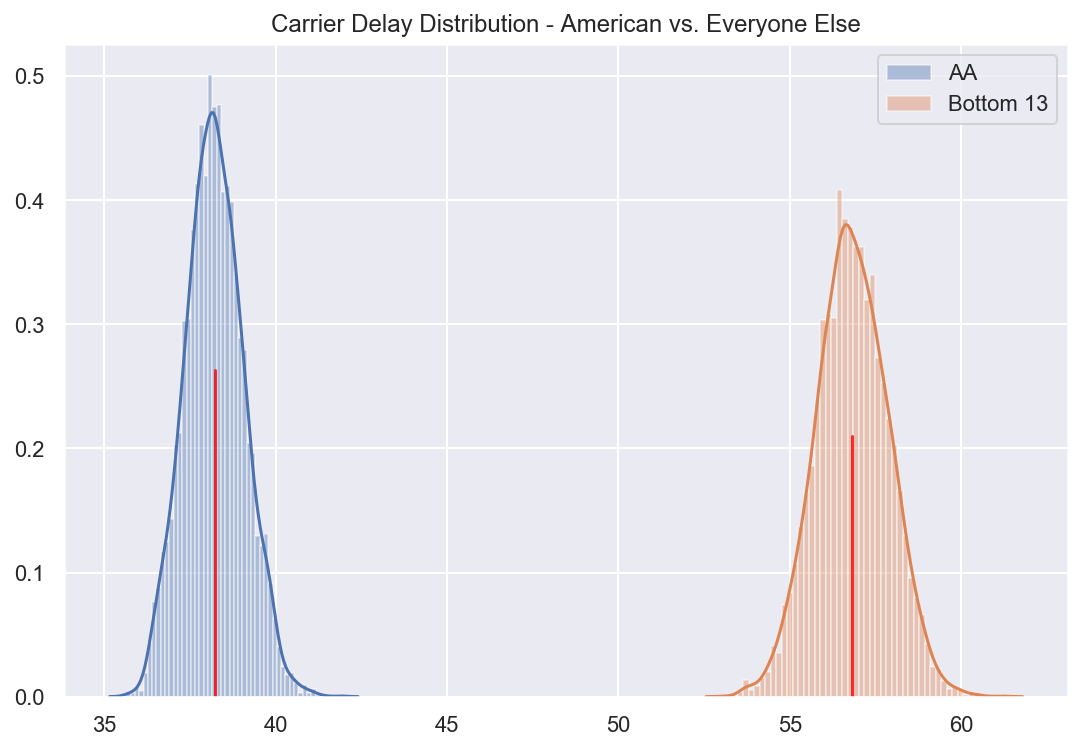

In [173]:
#f, ax = plt.subplots(1, 1)
plt.figure(figsize=(9,6))

# ax = sns.distplot(top_3_nonAA_DELAY_RSM, bins=50, kde=True, label = 'Top 3')
ax = sns.distplot(AA_RSM, bins=50, kde=True, label = 'AA')
ax = sns.distplot(everyone_else_DELAY_RSM, bins=50, kde=True, label = 'Bottom 13')
# ax = sns.distplot(UA_DELAY_RSM, bins=50, kde=True, label = 'UA')
# ax = sns.distplot(WN_DELAY_RSM , bins=50, kde=True, label = 'WN')
# ax = sns.distplot(DL_DELAY_RSM, bins=50, kde=True, label = 'DL')
# #sns.set(context='talk')
ax.set_title('Carrier Delay Distribution - American vs. Everyone Else')

# plt.axvline(top_3_nonAA_DELAY_RSM.mean(), 0, .65, color='red', alpha=.8)
plt.axvline(AA_RSM.mean(), 0, .5, color='red', alpha=.8)
plt.axvline(everyone_else_DELAY_RSM.mean(), 0, .4, color='red', alpha=.8)
# plt.axvline(UA_DELAY_RSM.mean(), 0, .5, color='red', alpha=.8)
# plt.axvline(WN_DELAY_RSM.mean(), 0, .95 , color='red', alpha=.8)
# plt.axvline(DL_DELAY_RSM.mean(), 0, .4, color='red', alpha=.8)

ax.legend()

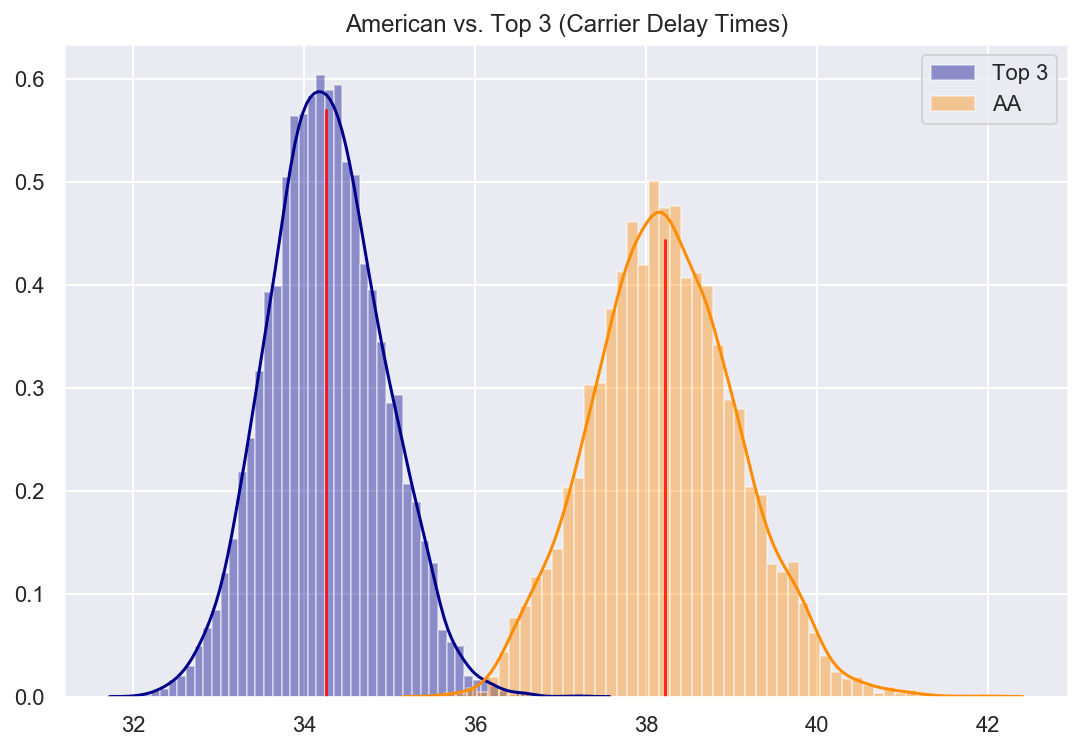

In [186]:
#f, ax = plt.subplots(1, 1)
plt.figure(figsize=(9,6))

ax = sns.distplot(top_3_nonAA_DELAY_RSM, bins=50, kde=True, label = 'Top 3', color = 'darkblue')
ax = sns.distplot(AA_RSM, bins=50, kde=True, label = 'AA', color = 'darkorange')
# ax = sns.distplot(everyone_else_DELAY_RSM, bins=50, kde=True, label = 'Bottom 13')
# ax = sns.distplot(UA_DELAY_RSM, bins=50, kde=True, label = 'UA')
# ax = sns.distplot(WN_DELAY_RSM , bins=50, kde=True, label = 'WN')
# ax = sns.distplot(DL_DELAY_RSM, bins=50, kde=True, label = 'DL')
# #sns.set(context='talk')
ax.set_title('American vs. Top 3 (Carrier Delay Times)')

plt.axvline(top_3_nonAA_DELAY_RSM.mean(), 0, .9, color='red', alpha=.8)
plt.axvline(AA_RSM.mean(), 0, .7, color='red', alpha=.8)
# plt.axvline(everyone_else_DELAY_RSM.mean(), 0, .4, color='red', alpha=.8)
# plt.axvline(UA_DELAY_RSM.mean(), 0, .5, color='red', alpha=.8)
# plt.axvline(WN_DELAY_RSM.mean(), 0, .95 , color='red', alpha=.8)
# plt.axvline(DL_DELAY_RSM.mean(), 0, .4, color='red', alpha=.8)

ax.legend()

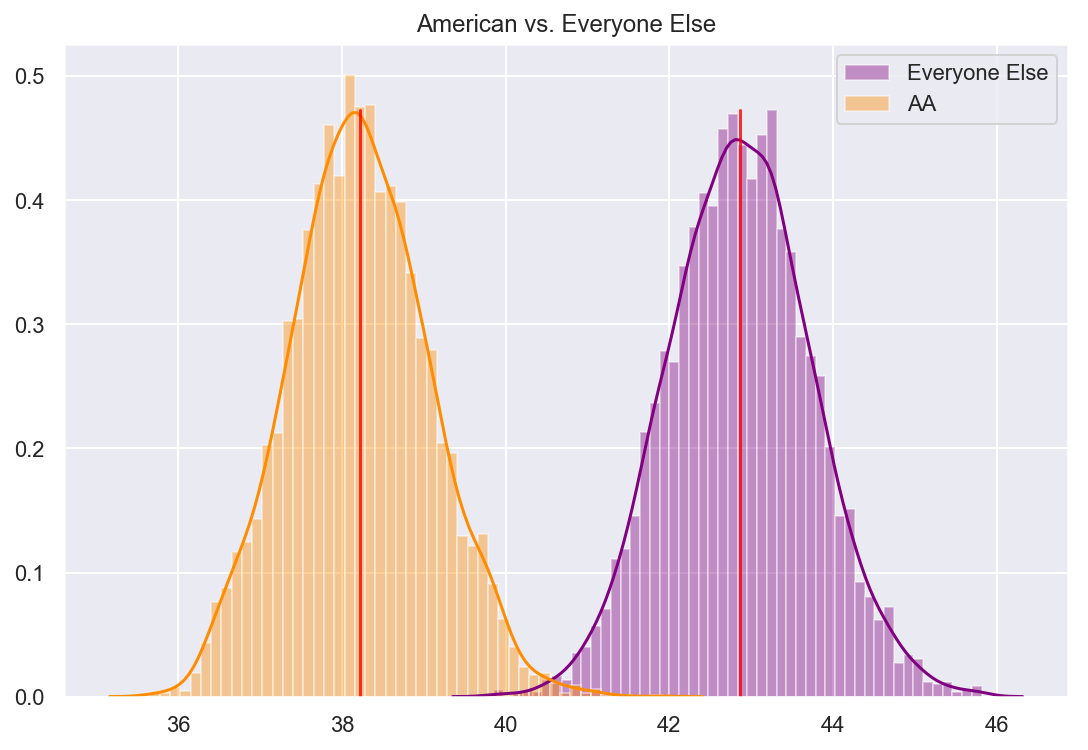

In [188]:
pop_RSM

plt.figure(figsize=(9,6))

ax = sns.distplot(pop_RSM, bins=50, kde=True, label = 'Everyone Else', color = 'purple')
ax = sns.distplot(AA_RSM, bins=50, kde=True, label = 'AA', color = 'darkorange')

ax.set_title('American vs. Everyone Else')

plt.axvline(pop_RSM.mean(), 0, .9, color='red', alpha=.8)
plt.axvline(AA_RSM.mean(), 0, .9, color='red', alpha=.8)

ax.legend()

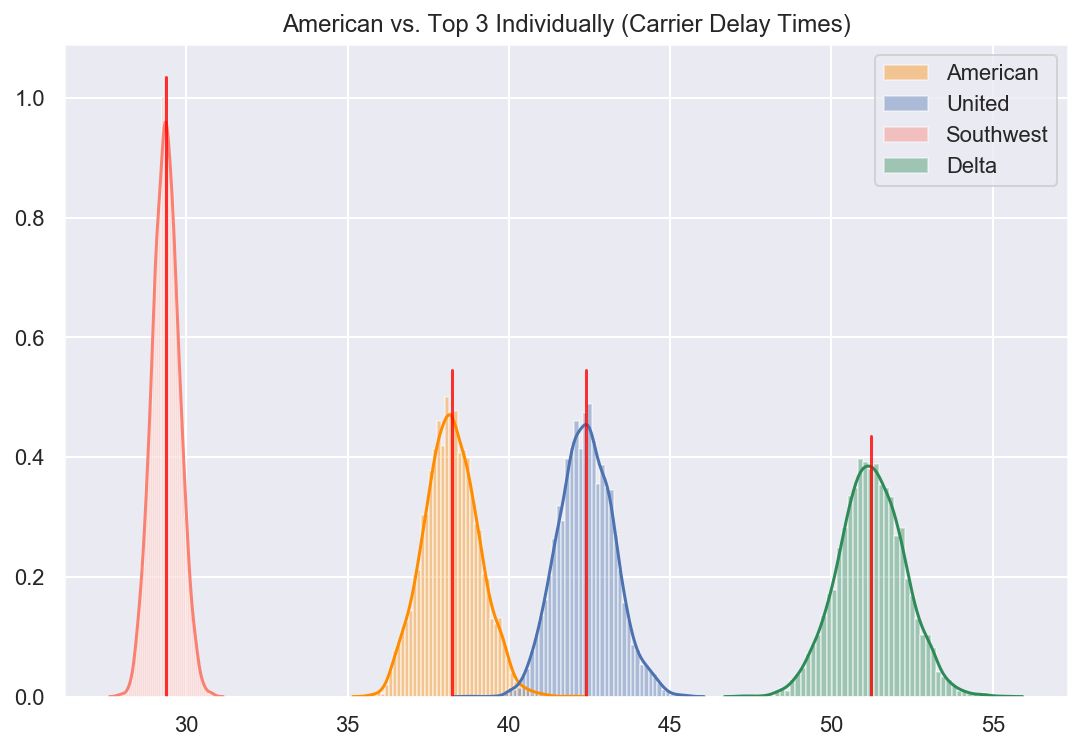

In [195]:
plt.figure(figsize=(9,6))

ax = sns.distplot(AA_RSM, bins=50, kde=True, label = 'American', color = 'darkorange')
ax = sns.distplot(UA_DELAY_RSM, bins=50, kde=True, label = 'United')
ax = sns.distplot(WN_DELAY_RSM , bins=50, kde=True, label = 'Southwest', color = 'salmon')
ax = sns.distplot(DL_DELAY_RSM, bins=50, kde=True, label = 'Delta', color = 'seagreen')

ax.set_title('American vs. Top 3 Individually (Carrier Delay Times)')

plt.axvline(AA_RSM.mean(), 0, .5, color='red', alpha=.8)
plt.axvline(UA_DELAY_RSM.mean(), 0, .5, color='red', alpha=.8)
plt.axvline(WN_DELAY_RSM.mean(), 0, .95 , color='red', alpha=.8)
plt.axvline(DL_DELAY_RSM.mean(), 0, .4, color='red', alpha=.8)

ax.legend()

[Text(0.5, 0, 'Carrier Delay Time')]

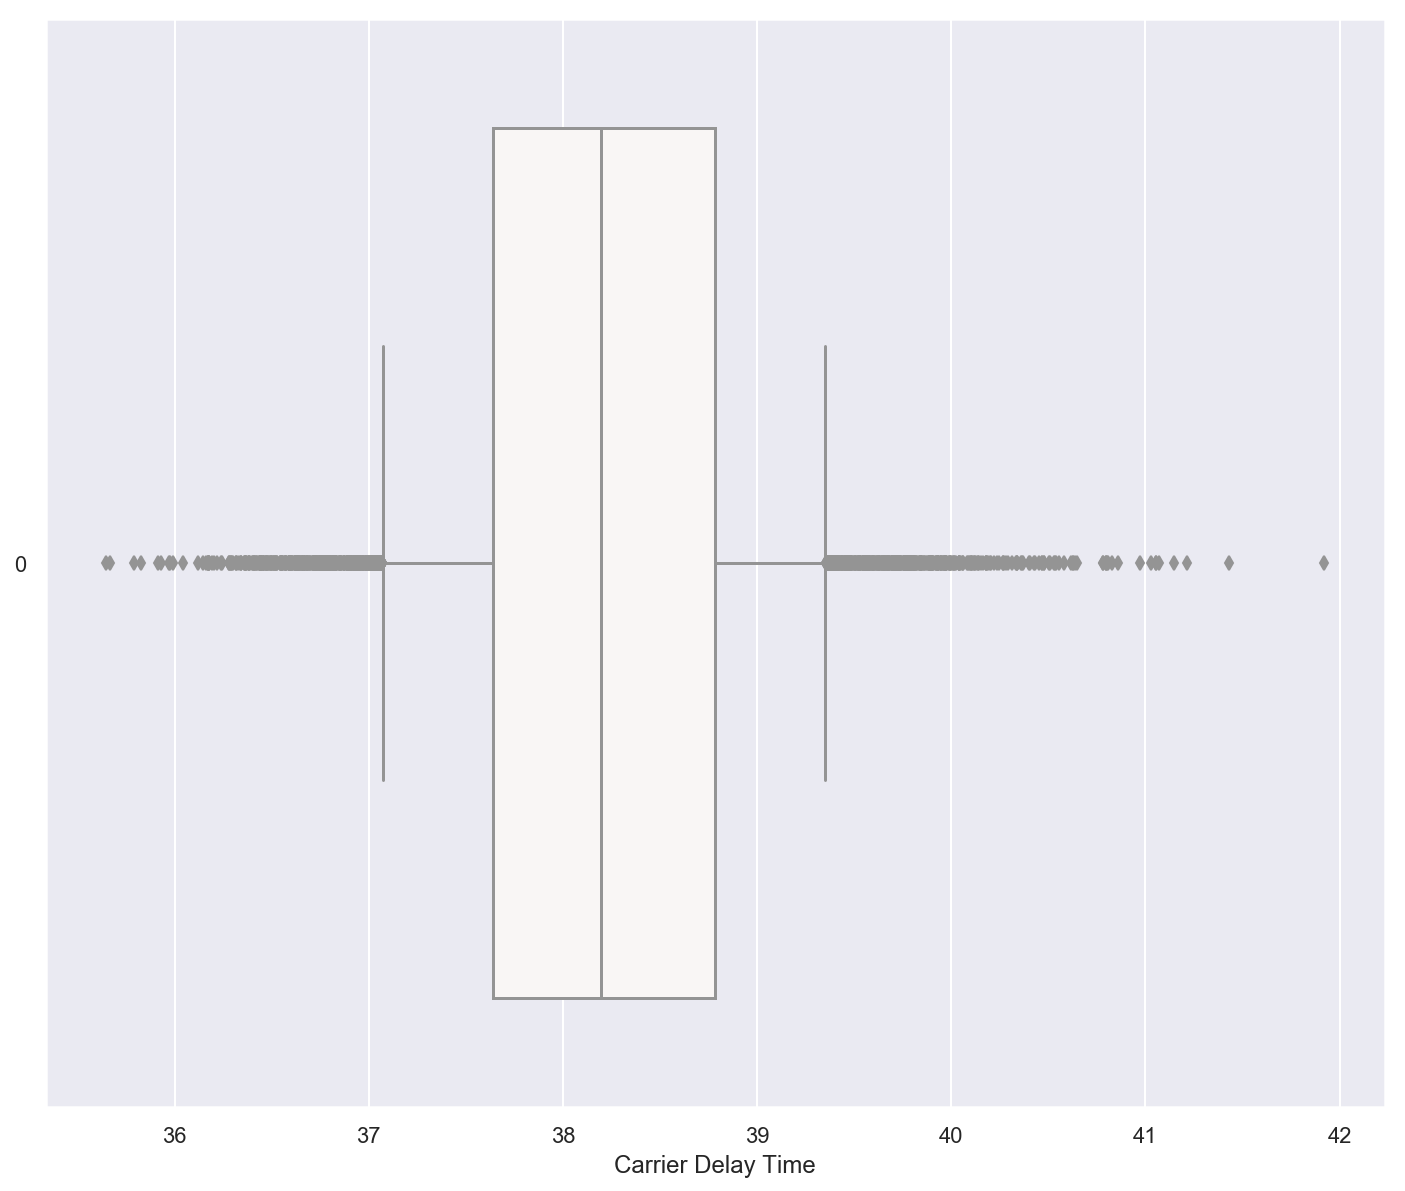

In [171]:
ax = sns.boxplot(data=AA_RSM_df, orient = 'h', palette = 'vlag', whis = .5)
ax.set(xlabel = 'Carrier Delay Time')